<a href="https://colab.research.google.com/github/petitmeau/Python-VMP/blob/main/DR_near_term.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# Importing necessary modules: the usual suspects!
%matplotlib inline
from bokeh.io import output_notebook
from bokeh import models, palettes, transform
from bokeh.plotting import figure, show
import numpy as np
import pandas as pd
import pydotplus


import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import cluster, decomposition, pipeline, preprocessing, tree
import statsmodels

from yellowbrick.cluster.silhouette import SilhouetteVisualizer
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage

#import fancyimpute
import missingno as mn

import io
import urllib.request as req
import zipfile

import warnings
warnings.filterwarnings("ignore")

In [201]:
#Import data
df = pd.read_excel('/content/drive/MyDrive/DR near term/Copy of DR near term.xlsx')
df.head(26)

,Numéro patient,Lieu naissance,Terme,Sexe,PN,CTC < 15j,Voie accouchement,FiO2 max_H1,PEEP_H1,OSI_H1,...,FiO2 max_H48,PEEP_H48,Mode_ventilation_H48,LUS_6_H48,Outcome,Surfactant,Diagnosis,Heure arrêt CPAP,Unnamed: 46,Unnamed: 47
0,1,HFB,34.8,F,1980,no,voie basse,21.0,6.0,1.298969,...,NaN,NaN,VS 21%,NaN,Non transféré,non,DRT,5,NaN,NaN
1,2,HFB,34.8,M,2400,no,voie basse,30.0,6.0,1.855670,...,NaN,NaN,NaN,NaN,Non transféré,non,DRT,15,NaN,NaN
2,3,HFB,41.0,M,3550,no,voie basse,23.0,0.0,0.000000,...,25.0,6.0,CPAP,NaN,Transféré,non,DRT,48,NaN,NaN
3,4,HFB,40.0,F,3050,no,voie basse,21.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,Non transféré,non,DRT,pas d'O2,NaN,NaN
4,5,HFB,40.7,M,3700,no,voie basse,40.0,6.0,2.474227,...,NaN,NaN,NaN,NaN,Non transféré,non,Pneumothorax,2,NaN,NaN
5,6,HFB,37.0,F,2630,no,césarienne avant travail,0.5,0.0,0.000000,...,21.0,5.0,CPAP,NaN,Transféré,non,MMH,48,NaN,NaN
6,7,HFB,38.7,F,2960,no,césarienne en urgence,50.0,0.0,0.000000,...,21.0,0.0,VS 21%,NaN,Non transféré,non,DRT,1,NaN,NaN
7,8,HFB,40.6,F,3260,no,voie basse,25.0,0.0,0.000000,...,NaN,NaN,VS 21%,NaN,Non transféré,non,Pneumothorax,2,NaN,NaN
8,9,HFB,39.0,M,3800,no,voie basse,30.0,5.0,1.546392,...,NaN,NaN,VS 21%,NaN,Non transféré,non,Pneumothorax,1,NaN,NaN
9,10,Versailles,35.8,F,3100,no,césarienne en urgence,35.0,5.0,1.804124,...,21.0,0.0,VS 21%,NaN,Non transféré,oui,MMH,16,>12 (surfactant H6),NaN


In [ ]:
df.tail(5)

,Numéro patient,Lieu naissance,Terme,Sexe,PN,CTC < 15j,Voie accouchement,FiO2 max_H1,PEEP_H1,OSI_H1,...,FiO2 max_H48,PEEP_H48,Mode_ventilation_H48,LUS_6_H48,Outcome,Surfactant,Diagnosis,Heure arrêt CPAP,Unnamed: 46,Unnamed: 47
61,74,Versailles,41.0,NaN,3000,no,voie basse,30.0,6.0,1.855670,...,NaN,0.0,VS 21%,NaN,Non transféré,non,DRT,20,NaN,>18
62,75,Versailles,41.7,NaN,3575,no,césarienne en urgence,35.0,6.0,2.164948,...,21.0,5.0,CPAP,NaN,Non transféré,non,DRT,50,NaN,>48
63,76,Versailles,39.1,NaN,3435,no,césarienne en urgence,30.0,6.0,1.855670,...,NaN,0.0,VS 21%,NaN,Non transféré,non,DRT,20,NaN,>18
64,77,Versailles,38.1,NaN,3100,no,voie basse,30.0,6.0,1.855670,...,NaN,0.0,VS 21%,NaN,Non transféré,non,DRT,26,NaN,>24
65,78,Versailles,38.6,NaN,2555,no,voie basse,28.0,6.0,1.731959,...,21.0,0.0,VS 21%,NaN,Non transféré,non,DRT,16,NaN,>12


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Numéro patient        66 non-null     int64  
 1   Lieu naissance        66 non-null     object 
 2   Terme                 66 non-null     float64
 3   Sexe                  52 non-null     object 
 4   PN                    66 non-null     int64  
 5   CTC < 15j             66 non-null     object 
 6   Voie accouchement     66 non-null     object 
 7   FiO2 max_H1           66 non-null     float64
 8   PEEP_H1               65 non-null     float64
 9   OSI_H1                66 non-null     float64
 10  Siverman_H1           59 non-null     float64
 11  Mode_ventilation_H1   66 non-null     object 
 12  LUS_6_H1              27 non-null     object 
 13  Radio                 66 non-null     object 
 14  FiO2 max_H2           61 non-null     float64
 15  PEEP_H2               58 

In [4]:
#Create a copy
df1 = df.copy()

In [ ]:
df1.describe()

,Numéro patient,Terme,PN,FiO2 max_H1,PEEP_H1,OSI_H1,Siverman_H1,FiO2 max_H2,PEEP_H2,FiO2 max_H3,...,FiO2 max_H12,PEEP_H12,LUS_6_H12,FiO2 max_H18,PEEP_H18,FiO2 max_H24,PEEP_H24,FiO2 max_H48,PEEP_H48,LUS_6_H48
count,66.000000,66.000000,66.000000,66.000000,65.000000,66.000000,59.000000,61.000000,58.000000,57.000000,...,53.000000,50.000000,9.000000,48.000000,47.000000,41.000000,39.000000,30.000000,32.000000,3.000000
mean,39.424242,38.604545,3191.909091,28.636364,4.384615,1.410497,3.847458,24.140984,4.362069,22.694737,...,20.786792,3.600000,3.444444,17.358333,1.765957,20.217073,1.025641,19.760000,0.500000,1.666667
std,23.339673,2.576905,631.541331,18.103239,2.369680,1.225242,2.250008,16.540419,2.432948,13.246474,...,7.068267,2.482592,2.297341,8.308412,2.415644,6.297654,2.070942,5.313003,1.586231,2.081666
min,1.000000,33.300000,1980.000000,0.500000,0.000000,0.000000,0.000000,0.100000,0.000000,0.300000,...,0.300000,0.000000,0.000000,0.100000,0.000000,0.100000,0.000000,0.300000,0.000000,0.000000
25%,22.250000,35.875000,2647.500000,21.000000,5.000000,1.082474,2.500000,21.000000,5.000000,21.000000,...,21.000000,0.000000,2.000000,21.000000,0.000000,21.000000,0.000000,21.000000,0.000000,0.500000
50%,38.500000,39.300000,3247.500000,25.000000,5.000000,1.371134,4.000000,21.000000,5.000000,21.000000,...,21.000000,5.000000,4.000000,21.000000,0.000000,21.000000,0.000000,21.000000,0.000000,1.000000
75%,61.750000,40.700000,3601.250000,30.000000,6.000000,1.855670,5.000000,28.000000,6.000000,25.000000,...,21.000000,5.000000,6.000000,21.000000,4.000000,21.000000,0.000000,21.000000,0.000000,2.500000
max,78.000000,42.000000,4420.000000,100.000000,7.000000,6.185567,10.000000,100.000000,7.000000,100.000000,...,40.000000,7.000000,6.000000,26.000000,6.000000,35.000000,6.000000,25.000000,6.000000,4.000000


In [ ]:
# description for categorical values
df1.describe(include='object')

,Lieu naissance,Sexe,CTC < 15j,Voie accouchement,Mode_ventilation_H1,LUS_6_H1,Radio,Mode_ventilation_H2,LUS_6_H2,Mode_ventilation_H3,...,LUS_6_H18,Mode_ventilation_H24,LUS_6_H24,Mode_ventilation_H48,Outcome,Surfactant,Diagnosis,Heure arrêt CPAP,Unnamed: 46,Unnamed: 47
count,66,52,66,66,66,27,66,64,29,62,...,2,62,4,60,66,66,66,61,7,14
unique,2,2,2,3,3,9,8,4,10,4,...,2,4,3,4,2,2,6,28,6,5
top,HFB,M,no,voie basse,CPAP,Ptx,No done,CPAP,6,CPAP,...,Ptx,VS 21%,Ptx,VS 21%,Non transféré,non,DRT,16,>18,>12
freq,45,30,63,45,52,6,30,46,8,46,...,1,42,2,47,53,64,42,10,2,6


<Axes: xlabel='PN', ylabel='Count'>

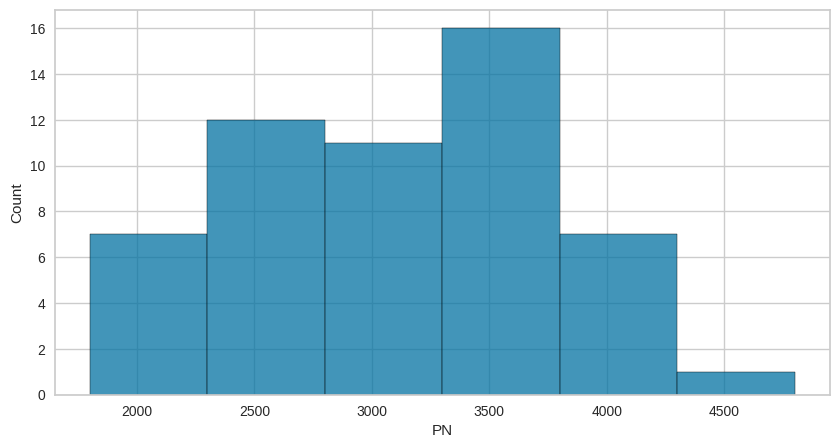

In [197]:
# histplot for Terme and PN
plt.figure(figsize=(10,5))
bins = np.arange(1800, 5000, 500)
sns.histplot(df1['PN'], bins = bins)

([<matplotlib.axis.XTick at 0x788a0c949ea0>,
 [Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36'),
  Text(37, 0, '37'),
  Text(38, 0, '38'),
  Text(39, 0, '39'),
  Text(40, 0, '40'),
  Text(41, 0, '41'),
  Text(42, 0, '42'),
  Text(43, 0, '43')])

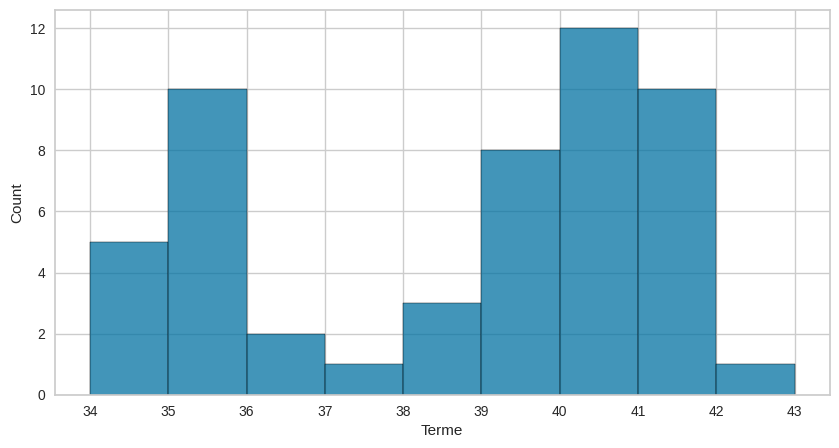

In [200]:
plt.figure(figsize=(10,5))
bins = np.arange(34, 44, 1)
sns.histplot(df1['Terme'], bins = bins)
plt.xticks(np.arange(34, 44, 1))

In [ ]:
df1['Voie accouchement'].value_counts()

,count
Voie accouchement,
voie basse,45
césarienne en urgence,15
césarienne avant travail,6


In [ ]:
df1['Sexe'].value_counts()

,count
Sexe,
M,30
F,22


In [ ]:
df1['Mode_ventilation_H3'].value_counts()

,count
Mode_ventilation_H3,
CPAP,46
VS 21%,7
O2 nasal,7
Invasif,2


In [ ]:
df1['Diagnosis'].value_counts()

,count
Diagnosis,
DRT,42
Pneumothorax,10
Alvéolite,8
MMH,4
MAS,1
Autre,1


In [5]:
#Remove rows where FiO2 max_H1 and FiO2 max_H2 are < 21
df1 = df1[(df1['FiO2 max_H1'] >= 21) & (df1['FiO2 max_H2'] >= 21)]
df1.head()

,Numéro patient,Lieu naissance,Terme,Sexe,PN,CTC < 15j,Voie accouchement,FiO2 max_H1,PEEP_H1,OSI_H1,...,FiO2 max_H48,PEEP_H48,Mode_ventilation_H48,LUS_6_H48,Outcome,Surfactant,Diagnosis,Heure arrêt CPAP,Unnamed: 46,Unnamed: 47
0,1,HFB,34.8,F,1980,no,voie basse,21.0,6.0,1.298969,...,NaN,NaN,VS 21%,NaN,Non transféré,non,DRT,5,NaN,NaN
1,2,HFB,34.8,M,2400,no,voie basse,30.0,6.0,1.855670,...,NaN,NaN,NaN,NaN,Non transféré,non,DRT,15,NaN,NaN
2,3,HFB,41.0,M,3550,no,voie basse,23.0,0.0,0.000000,...,25.0,6.0,CPAP,NaN,Transféré,non,DRT,48,NaN,NaN
8,9,HFB,39.0,M,3800,no,voie basse,30.0,5.0,1.546392,...,NaN,NaN,VS 21%,NaN,Non transféré,non,Pneumothorax,1,NaN,NaN
9,10,Versailles,35.8,F,3100,no,césarienne en urgence,35.0,5.0,1.804124,...,21.0,0.0,VS 21%,NaN,Non transféré,oui,MMH,16,>12 (surfactant H6),NaN


In [ ]:
# count how many pneumothorax (Ptx): how many times "Diagnosis" is "Pneumothorax"
df1['Diagnosis'].unique()

# how many times is Pneumothorax
df1['Diagnosis'].value_counts()

,count
Diagnosis,
DRT,37
Pneumothorax,7
Alvéolite,6
MMH,3
Autre,1


In [ ]:
df1.describe()

,Numéro patient,Terme,PN,FiO2 max_H1,PEEP_H1,OSI_H1,Siverman_H1,FiO2 max_H2,PEEP_H2,FiO2 max_H3,...,FiO2 max_H12,PEEP_H12,LUS_6_H12,FiO2 max_H18,PEEP_H18,FiO2 max_H24,PEEP_H24,FiO2 max_H48,PEEP_H48,LUS_6_H48
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,50.000000,54.000000,52.000000,51.000000,...,48.000000,45.000000,7.000000,42.000000,42.000000,36.000000,35.000000,26.000000,30.000000,3.000000
mean,42.462963,38.372222,3111.129630,30.685185,4.981481,1.627530,3.980000,27.222222,4.865385,24.907843,...,22.479167,3.888889,3.857143,19.295238,1.857143,20.483333,0.971429,20.357692,0.366667,1.666667
std,23.438972,2.711848,611.737336,17.973591,1.858085,1.197344,2.245085,15.014040,2.029477,11.917766,...,4.130785,2.357023,2.478479,6.302804,2.445219,5.688811,1.992423,4.165398,1.401559,2.081666
min,1.000000,33.300000,1980.000000,21.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.300000,...,21.000000,0.000000,0.000000,0.100000,0.000000,0.100000,0.000000,0.300000,0.000000,0.000000
25%,24.250000,35.625000,2565.000000,21.000000,5.000000,1.082474,3.000000,21.000000,5.000000,21.000000,...,21.000000,4.000000,2.500000,21.000000,0.000000,21.000000,0.000000,21.000000,0.000000,0.500000
50%,41.500000,39.050000,3227.500000,26.500000,6.000000,1.546392,4.000000,22.000000,5.500000,21.000000,...,21.000000,5.000000,4.000000,21.000000,0.000000,21.000000,0.000000,21.000000,0.000000,1.000000
75%,64.750000,40.700000,3540.000000,30.000000,6.000000,1.855670,5.000000,28.000000,6.000000,25.000000,...,21.000000,5.000000,6.000000,21.000000,4.000000,21.000000,0.000000,21.000000,0.000000,2.500000
max,78.000000,42.000000,4370.000000,100.000000,7.000000,6.185567,10.000000,100.000000,7.000000,100.000000,...,40.000000,7.000000,6.000000,26.000000,6.000000,35.000000,6.000000,25.000000,6.000000,4.000000


In [ ]:
df1['LUS_6_H6']

,LUS_6_H6
0,NaN
1,NaN
2,7
8,NaN
9,10
10,NaN
11,NaN
12,NaN
13,NaN
14,NaN


In [6]:
# create a copy of df1
df2 = df1.copy()

In [ ]:
# Replace FiO2 max_H1, FiO2 max_H2 and FiO2 max_H3 values by "<30%" if values are <30% and by ">30%" if values are >= 30%
'''df2['FiO2 max_H1'] = np.where(df2['FiO2 max_H1'] < 30, '<30%', '≥30%')
df2['FiO2 max_H2'] = np.where(df2['FiO2 max_H2'] < 30, '<30%', '≥30%')
df2['FiO2 max_H3'] = np.where(df2['FiO2 max_H3'] < 30, '<30%', '≥30%')
df2.head()'''

"df2['FiO2 max_H1'] = np.where(df2['FiO2 max_H1'] < 30, '<30%', '≥30%')\ndf2['FiO2 max_H2'] = np.where(df2['FiO2 max_H2'] < 30, '<30%', '≥30%')\ndf2['FiO2 max_H3'] = np.where(df2['FiO2 max_H3'] < 30, '<30%', '≥30%')\ndf2.head()"

In [7]:
# delete columns with FiO2 max_H6, FiO2 max_H12, FiO2 max_H24, FiO2 max_H36, FiO2 max_H48
df2 = df2.drop(['FiO2 max_H12', 'FiO2 max_H24',  'FiO2 max_H48'], axis=1)
df2.head()

,Numéro patient,Lieu naissance,Terme,Sexe,PN,CTC < 15j,Voie accouchement,FiO2 max_H1,PEEP_H1,OSI_H1,...,LUS_6_H24,PEEP_H48,Mode_ventilation_H48,LUS_6_H48,Outcome,Surfactant,Diagnosis,Heure arrêt CPAP,Unnamed: 46,Unnamed: 47
0,1,HFB,34.8,F,1980,no,voie basse,21.0,6.0,1.298969,...,NaN,NaN,VS 21%,NaN,Non transféré,non,DRT,5,NaN,NaN
1,2,HFB,34.8,M,2400,no,voie basse,30.0,6.0,1.855670,...,NaN,NaN,NaN,NaN,Non transféré,non,DRT,15,NaN,NaN
2,3,HFB,41.0,M,3550,no,voie basse,23.0,0.0,0.000000,...,NaN,6.0,CPAP,NaN,Transféré,non,DRT,48,NaN,NaN
8,9,HFB,39.0,M,3800,no,voie basse,30.0,5.0,1.546392,...,NaN,NaN,VS 21%,NaN,Non transféré,non,Pneumothorax,1,NaN,NaN
9,10,Versailles,35.8,F,3100,no,césarienne en urgence,35.0,5.0,1.804124,...,NaN,0.0,VS 21%,NaN,Non transféré,oui,MMH,16,>12 (surfactant H6),NaN


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 0 to 65
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Numéro patient        54 non-null     int64  
 1   Lieu naissance        54 non-null     object 
 2   Terme                 54 non-null     float64
 3   Sexe                  40 non-null     object 
 4   PN                    54 non-null     int64  
 5   CTC < 15j             54 non-null     object 
 6   Voie accouchement     54 non-null     object 
 7   FiO2 max_H1           54 non-null     float64
 8   PEEP_H1               54 non-null     float64
 9   OSI_H1                54 non-null     float64
 10  Siverman_H1           50 non-null     float64
 11  Mode_ventilation_H1   54 non-null     object 
 12  LUS_6_H1              24 non-null     object 
 13  Radio                 54 non-null     object 
 14  FiO2 max_H2           54 non-null     float64
 15  PEEP_H2               52 non-n

In [9]:
# Remove rows when PEEP_H1 or PEEP_H2 = 0: keep only patients on CPAP at H2
df2 = df2[(df2['PEEP_H1'] != 0) & (df2['PEEP_H2'] != 0)]
df2.head()

,Numéro patient,Lieu naissance,Terme,Sexe,PN,CTC < 15j,Voie accouchement,FiO2 max_H1,PEEP_H1,OSI_H1,...,LUS_6_H24,PEEP_H48,Mode_ventilation_H48,LUS_6_H48,Outcome,Surfactant,Diagnosis,Heure arrêt CPAP,Unnamed: 46,Unnamed: 47
0,1,HFB,34.8,F,1980,no,voie basse,21.0,6.0,1.298969,...,NaN,NaN,VS 21%,NaN,Non transféré,non,DRT,5,NaN,NaN
1,2,HFB,34.8,M,2400,no,voie basse,30.0,6.0,1.855670,...,NaN,NaN,NaN,NaN,Non transféré,non,DRT,15,NaN,NaN
9,10,Versailles,35.8,F,3100,no,césarienne en urgence,35.0,5.0,1.804124,...,NaN,0.0,VS 21%,NaN,Non transféré,oui,MMH,16,>12 (surfactant H6),NaN
10,11,Versailles,36.1,M,2595,no,césarienne avant travail,26.0,6.0,1.608247,...,NaN,NaN,CPAP,NaN,Transféré,oui,MMH,50,>48,NaN
11,12,Versailles,41.4,M,3490,no,voie basse,30.0,6.0,1.855670,...,NaN,0.0,VS 21%,NaN,Non transféré,non,DRT,20,>18,NaN


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 0 to 65
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Numéro patient        44 non-null     int64  
 1   Lieu naissance        44 non-null     object 
 2   Terme                 44 non-null     float64
 3   Sexe                  30 non-null     object 
 4   PN                    44 non-null     int64  
 5   CTC < 15j             44 non-null     object 
 6   Voie accouchement     44 non-null     object 
 7   FiO2 max_H1           44 non-null     float64
 8   PEEP_H1               44 non-null     float64
 9   OSI_H1                44 non-null     float64
 10  Siverman_H1           40 non-null     float64
 11  Mode_ventilation_H1   44 non-null     object 
 12  LUS_6_H1              23 non-null     object 
 13  Radio                 44 non-null     object 
 14  FiO2 max_H2           44 non-null     float64
 15  PEEP_H2               43 non-n

In [11]:
# count how many pneumothorax (Ptx): how many times "Diagnosis" is "Pneumothorax"
df2['Diagnosis'].value_counts()

,count
Diagnosis,
DRT,32
Pneumothorax,5
Alvéolite,4
MMH,2
Autre,1


In [12]:
# drop rows where 'Heure arrêt CPAP' = NaN
df2.dropna(subset=['Heure arrêt CPAP'], inplace=True)
df2.head()

,Numéro patient,Lieu naissance,Terme,Sexe,PN,CTC < 15j,Voie accouchement,FiO2 max_H1,PEEP_H1,OSI_H1,...,LUS_6_H24,PEEP_H48,Mode_ventilation_H48,LUS_6_H48,Outcome,Surfactant,Diagnosis,Heure arrêt CPAP,Unnamed: 46,Unnamed: 47
0,1,HFB,34.8,F,1980,no,voie basse,21.0,6.0,1.298969,...,NaN,NaN,VS 21%,NaN,Non transféré,non,DRT,5,NaN,NaN
1,2,HFB,34.8,M,2400,no,voie basse,30.0,6.0,1.855670,...,NaN,NaN,NaN,NaN,Non transféré,non,DRT,15,NaN,NaN
9,10,Versailles,35.8,F,3100,no,césarienne en urgence,35.0,5.0,1.804124,...,NaN,0.0,VS 21%,NaN,Non transféré,oui,MMH,16,>12 (surfactant H6),NaN
10,11,Versailles,36.1,M,2595,no,césarienne avant travail,26.0,6.0,1.608247,...,NaN,NaN,CPAP,NaN,Transféré,oui,MMH,50,>48,NaN
11,12,Versailles,41.4,M,3490,no,voie basse,30.0,6.0,1.855670,...,NaN,0.0,VS 21%,NaN,Non transféré,non,DRT,20,>18,NaN


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 0 to 65
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Numéro patient        44 non-null     int64  
 1   Lieu naissance        44 non-null     object 
 2   Terme                 44 non-null     float64
 3   Sexe                  30 non-null     object 
 4   PN                    44 non-null     int64  
 5   CTC < 15j             44 non-null     object 
 6   Voie accouchement     44 non-null     object 
 7   FiO2 max_H1           44 non-null     float64
 8   PEEP_H1               44 non-null     float64
 9   OSI_H1                44 non-null     float64
 10  Siverman_H1           40 non-null     float64
 11  Mode_ventilation_H1   44 non-null     object 
 12  LUS_6_H1              23 non-null     object 
 13  Radio                 44 non-null     object 
 14  FiO2 max_H2           44 non-null     float64
 15  PEEP_H2               43 non-n

In [ ]:
df2['Heure arrêt CPAP']

,Heure arrêt CPAP
0,5
1,15
9,16
10,50
11,20
12,20
13,16
14,4
15,28
16,9


In [14]:
# create a new columns with bins for Heure arrêt CPAP: <=12h, ]12,24], >24
df2['delai_stop_CPAP'] = pd.cut(df2['Heure arrêt CPAP'], bins=[-np.inf, 12, 24, np.inf], labels=['<=12h', '12-24h', '>24h'])
df2.head()

,Numéro patient,Lieu naissance,Terme,Sexe,PN,CTC < 15j,Voie accouchement,FiO2 max_H1,PEEP_H1,OSI_H1,...,PEEP_H48,Mode_ventilation_H48,LUS_6_H48,Outcome,Surfactant,Diagnosis,Heure arrêt CPAP,Unnamed: 46,Unnamed: 47,delai_stop_CPAP
0,1,HFB,34.8,F,1980,no,voie basse,21.0,6.0,1.298969,...,NaN,VS 21%,NaN,Non transféré,non,DRT,5,NaN,NaN,<=12h
1,2,HFB,34.8,M,2400,no,voie basse,30.0,6.0,1.855670,...,NaN,NaN,NaN,Non transféré,non,DRT,15,NaN,NaN,12-24h
9,10,Versailles,35.8,F,3100,no,césarienne en urgence,35.0,5.0,1.804124,...,0.0,VS 21%,NaN,Non transféré,oui,MMH,16,>12 (surfactant H6),NaN,12-24h
10,11,Versailles,36.1,M,2595,no,césarienne avant travail,26.0,6.0,1.608247,...,NaN,CPAP,NaN,Transféré,oui,MMH,50,>48,NaN,>24h
11,12,Versailles,41.4,M,3490,no,voie basse,30.0,6.0,1.855670,...,0.0,VS 21%,NaN,Non transféré,non,DRT,20,>18,NaN,12-24h


In [15]:
# show df2 columns LUS_6_H1, LUS_6_H2 and LUS_6_H3
df2[['LUS_6_H1', 'LUS_6_H2', 'LUS_6_H3']]

,LUS_6_H1,LUS_6_H2,LUS_6_H3
0,NaN,0,NaN
1,NaN,6,NaN
9,9,8,9
10,10,10,NaN
11,7,5,NaN
12,NaN,8,NaN
13,9,9,NaN
14,5,5,NaN
15,NaN,7,7
16,NaN,NaN,NaN


In [16]:
# Remove rows where Diagnosis is Pneumothorax
df2 = df2[df2['Diagnosis'] != 'Pneumothorax']
df2.head()

,Numéro patient,Lieu naissance,Terme,Sexe,PN,CTC < 15j,Voie accouchement,FiO2 max_H1,PEEP_H1,OSI_H1,...,PEEP_H48,Mode_ventilation_H48,LUS_6_H48,Outcome,Surfactant,Diagnosis,Heure arrêt CPAP,Unnamed: 46,Unnamed: 47,delai_stop_CPAP
0,1,HFB,34.8,F,1980,no,voie basse,21.0,6.0,1.298969,...,NaN,VS 21%,NaN,Non transféré,non,DRT,5,NaN,NaN,<=12h
1,2,HFB,34.8,M,2400,no,voie basse,30.0,6.0,1.855670,...,NaN,NaN,NaN,Non transféré,non,DRT,15,NaN,NaN,12-24h
9,10,Versailles,35.8,F,3100,no,césarienne en urgence,35.0,5.0,1.804124,...,0.0,VS 21%,NaN,Non transféré,oui,MMH,16,>12 (surfactant H6),NaN,12-24h
10,11,Versailles,36.1,M,2595,no,césarienne avant travail,26.0,6.0,1.608247,...,NaN,CPAP,NaN,Transféré,oui,MMH,50,>48,NaN,>24h
11,12,Versailles,41.4,M,3490,no,voie basse,30.0,6.0,1.855670,...,0.0,VS 21%,NaN,Non transféré,non,DRT,20,>18,NaN,12-24h


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 0 to 65
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Numéro patient        39 non-null     int64   
 1   Lieu naissance        39 non-null     object  
 2   Terme                 39 non-null     float64 
 3   Sexe                  25 non-null     object  
 4   PN                    39 non-null     int64   
 5   CTC < 15j             39 non-null     object  
 6   Voie accouchement     39 non-null     object  
 7   FiO2 max_H1           39 non-null     float64 
 8   PEEP_H1               39 non-null     float64 
 9   OSI_H1                39 non-null     float64 
 10  Siverman_H1           37 non-null     float64 
 11  Mode_ventilation_H1   39 non-null     object  
 12  LUS_6_H1              20 non-null     object  
 13  Radio                 39 non-null     object  
 14  FiO2 max_H2           39 non-null     float64 
 15  PEEP_H2      

In [ ]:
df2.describe()

,Numéro patient,Terme,PN,FiO2 max_H1,PEEP_H1,OSI_H1,Siverman_H1,FiO2 max_H2,PEEP_H2,FiO2 max_H3,PEEP_H3,FiO2 max_H6,PEEP_H6,PEEP_H12,LUS_6_H12,FiO2 max_H18,PEEP_H18,PEEP_H24,PEEP_H48,LUS_6_H48
count,39.00000,39.000000,39.000000,39.000000,39.000000,39.000000,37.000000,39.000000,38.000000,38.000000,36.000000,38.000000,36.000000,35.000000,4.000000,32.000000,32.000000,29.000000,26.000000,2.00000
mean,45.74359,37.833333,3014.076923,29.923077,5.717949,1.747026,4.324324,27.000000,5.684211,24.236842,5.597222,23.473684,4.958333,3.571429,4.000000,19.900000,1.906250,0.793103,0.192308,2.50000
std,25.22605,2.727283,602.458620,13.057332,0.510352,0.803605,2.122028,12.686503,0.574469,4.194167,0.641643,4.711899,1.683428,2.416679,2.828427,5.174441,2.387594,1.780436,0.980581,2.12132
min,1.00000,33.300000,1980.000000,21.000000,5.000000,1.082474,0.000000,21.000000,5.000000,21.000000,4.000000,21.000000,0.000000,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,1.00000
25%,22.50000,35.000000,2420.000000,22.000000,5.000000,1.298969,3.000000,21.000000,5.000000,21.000000,5.000000,21.000000,5.000000,0.000000,3.000000,21.000000,0.000000,0.000000,0.000000,1.75000
50%,50.00000,38.300000,3070.000000,30.000000,6.000000,1.804124,4.000000,25.000000,6.000000,23.000000,6.000000,21.000000,5.000000,4.000000,5.000000,21.000000,0.000000,0.000000,0.000000,2.50000
75%,68.50000,40.450000,3495.000000,30.000000,6.000000,1.855670,5.000000,29.000000,6.000000,25.000000,6.000000,25.000000,6.000000,5.000000,6.000000,21.000000,4.000000,0.000000,0.000000,3.25000
max,78.00000,41.700000,4130.000000,100.000000,7.000000,6.185567,10.000000,100.000000,7.000000,40.000000,7.000000,45.000000,7.000000,7.000000,6.000000,25.000000,6.000000,5.000000,5.000000,4.00000


In [17]:
# Replace columns LUS_6_H1, LUS_6_H2 and LUS_6_H3 by one column containing max value between columns LUS_6_H1, LUS_6_H2 and LUS_6_H3 or NaN if only NaN values or Ptx if
for col in ['LUS_6_H1', 'LUS_6_H2', 'LUS_6_H3']:
    df2[col] = pd.to_numeric(df2[col], errors='coerce')

df2['LUS_6_before_H3'] = df2[['LUS_6_H1', 'LUS_6_H2', 'LUS_6_H3']].max(axis=1)
df2


,Numéro patient,Lieu naissance,Terme,Sexe,PN,CTC < 15j,Voie accouchement,FiO2 max_H1,PEEP_H1,OSI_H1,...,Mode_ventilation_H48,LUS_6_H48,Outcome,Surfactant,Diagnosis,Heure arrêt CPAP,Unnamed: 46,Unnamed: 47,delai_stop_CPAP,LUS_6_before_H3
0,1,HFB,34.8,F,1980,no,voie basse,21.0,6.0,1.298969,...,VS 21%,NaN,Non transféré,non,DRT,5,NaN,NaN,<=12h,0.0
1,2,HFB,34.8,M,2400,no,voie basse,30.0,6.0,1.855670,...,NaN,NaN,Non transféré,non,DRT,15,NaN,NaN,12-24h,6.0
9,10,Versailles,35.8,F,3100,no,césarienne en urgence,35.0,5.0,1.804124,...,VS 21%,NaN,Non transféré,oui,MMH,16,>12 (surfactant H6),NaN,12-24h,9.0
10,11,Versailles,36.1,M,2595,no,césarienne avant travail,26.0,6.0,1.608247,...,CPAP,NaN,Transféré,oui,MMH,50,>48,NaN,>24h,10.0
11,12,Versailles,41.4,M,3490,no,voie basse,30.0,6.0,1.855670,...,VS 21%,NaN,Non transféré,non,DRT,20,>18,NaN,12-24h,7.0
12,14,Versailles,35.0,M,2655,no,voie basse,30.0,6.0,1.855670,...,VS 21%,NaN,Non transféré,non,DRT,20,>18,NaN,12-24h,8.0
13,15,Versailles,36.3,F,2710,no,césarienne en urgence,50.0,6.0,1.855670,...,VS 21%,NaN,Non transféré,non,DRT,16,>12,NaN,12-24h,9.0
14,16,Versailles,38.3,M,2830,no,césarienne avant travail,23.0,5.0,1.546392,...,VS 21%,NaN,Non transféré,non,DRT,4,>3,NaN,<=12h,5.0
15,17,Versailles,41.0,F,3920,no,voie basse,30.0,6.0,1.855670,...,VS 21%,NaN,Non transféré,non,DRT,28,>24,NaN,>24h,7.0
16,22,HFB,35.0,M,2120,no,voie basse,30.0,6.0,1.855670,...,VS 21%,NaN,Non transféré,non,DRT,9,NaN,NaN,<=12h,NaN


In [18]:
# Create a columns "Invasive" that will return 0 if Mode_ventilation H1 or Mode_ventilation H2 or Mode_ventilation H3 or Mode_ventilation H6 or Mode_ventilation H12 or Mode_ventilation H18 or Mode_ventilation H24 or Mode_ventilation H48 values are "Invasif"
# If any of the Mode_ventilation columns contains 'Invasif', assign 1 to 'Invasive', otherwise assign 0.
df2['Invasive'] = np.where(df2['Mode_ventilation_H1'].str.contains('Invasif') | df2['Mode_ventilation_H2'].str.contains('Invasif') | df2['Mode_ventilation_H3'].str.contains('Invasif') | df2['Mode_ventilation_H6'].str.contains('Invasif') | df2['Mode_ventilation_H12'].str.contains('Invasif') | df2['Mode_ventilation_H18'].str.contains('Invasif') | df2['Mode_ventilation_H24'].str.contains('Invasif') | df2['Mode_ventilation_H48'].str.contains('Invasif'), 1, 0)
df2.head()

,Numéro patient,Lieu naissance,Terme,Sexe,PN,CTC < 15j,Voie accouchement,FiO2 max_H1,PEEP_H1,OSI_H1,...,LUS_6_H48,Outcome,Surfactant,Diagnosis,Heure arrêt CPAP,Unnamed: 46,Unnamed: 47,delai_stop_CPAP,LUS_6_before_H3,Invasive
0,1,HFB,34.8,F,1980,no,voie basse,21.0,6.0,1.298969,...,NaN,Non transféré,non,DRT,5,NaN,NaN,<=12h,0.0,0
1,2,HFB,34.8,M,2400,no,voie basse,30.0,6.0,1.855670,...,NaN,Non transféré,non,DRT,15,NaN,NaN,12-24h,6.0,0
9,10,Versailles,35.8,F,3100,no,césarienne en urgence,35.0,5.0,1.804124,...,NaN,Non transféré,oui,MMH,16,>12 (surfactant H6),NaN,12-24h,9.0,0
10,11,Versailles,36.1,M,2595,no,césarienne avant travail,26.0,6.0,1.608247,...,NaN,Transféré,oui,MMH,50,>48,NaN,>24h,10.0,0
11,12,Versailles,41.4,M,3490,no,voie basse,30.0,6.0,1.855670,...,NaN,Non transféré,non,DRT,20,>18,NaN,12-24h,7.0,0


In [19]:
# round OSI_H1, OSI_H2 and OSI_H3 values to 1 decimal
df2['OSI_H1'] = np.round(df2['OSI_H1'], 1)
df2.head()

,Numéro patient,Lieu naissance,Terme,Sexe,PN,CTC < 15j,Voie accouchement,FiO2 max_H1,PEEP_H1,OSI_H1,...,LUS_6_H48,Outcome,Surfactant,Diagnosis,Heure arrêt CPAP,Unnamed: 46,Unnamed: 47,delai_stop_CPAP,LUS_6_before_H3,Invasive
0,1,HFB,34.8,F,1980,no,voie basse,21.0,6.0,1.3,...,NaN,Non transféré,non,DRT,5,NaN,NaN,<=12h,0.0,0
1,2,HFB,34.8,M,2400,no,voie basse,30.0,6.0,1.9,...,NaN,Non transféré,non,DRT,15,NaN,NaN,12-24h,6.0,0
9,10,Versailles,35.8,F,3100,no,césarienne en urgence,35.0,5.0,1.8,...,NaN,Non transféré,oui,MMH,16,>12 (surfactant H6),NaN,12-24h,9.0,0
10,11,Versailles,36.1,M,2595,no,césarienne avant travail,26.0,6.0,1.6,...,NaN,Transféré,oui,MMH,50,>48,NaN,>24h,10.0,0
11,12,Versailles,41.4,M,3490,no,voie basse,30.0,6.0,1.9,...,NaN,Non transféré,non,DRT,20,>18,NaN,12-24h,7.0,0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 0 to 65
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Numéro patient        39 non-null     int64   
 1   Lieu naissance        39 non-null     object  
 2   Terme                 39 non-null     float64 
 3   Sexe                  25 non-null     object  
 4   PN                    39 non-null     int64   
 5   CTC < 15j             39 non-null     object  
 6   Voie accouchement     39 non-null     object  
 7   FiO2 max_H1           39 non-null     float64 
 8   PEEP_H1               39 non-null     float64 
 9   OSI_H1                39 non-null     float64 
 10  Siverman_H1           37 non-null     float64 
 11  Mode_ventilation_H1   39 non-null     object  
 12  LUS_6_H1              20 non-null     float64 
 13  Radio                 39 non-null     object  
 14  FiO2 max_H2           39 non-null     float64 
 15  PEEP_H2      

In [ ]:
# count how many LUS_6_before_H3 is <9:
df2[df2['LUS_6_before_H3'] <9].count()


,0
Numéro patient,28
Lieu naissance,28
Terme,28
Sexe,16
PN,28
CTC < 15j,28
Voie accouchement,28
FiO2 max_H1,28
PEEP_H1,28
OSI_H1,28


In [ ]:
# Replace values in column LUS_6_before_H3 by "<9" if value is <9, by "≥9" if value is >=9 and by NaN if it is NaN
'''for val in df2['LUS_6_before_H3']:
  if val < 9:
    df2['LUS_6_before_H3'] = df2['LUS_6_before_H3'].replace(val, '<9')
  elif val >= 9:
    df2['LUS_6_before_H3'] = df2['LUS_6_before_H3'].replace(val, '>=9')
  else:
    df2['LUS_6_before_H3'] = df2['LUS_6_before_H3'].replace(val, np.nan)

df2.head()'''

,Numéro patient,Lieu naissance,Terme,Sexe,PN,CTC < 15j,Voie accouchement,FiO2 max_H1,PEEP_H1,OSI_H1,...,LUS_6_H24,PEEP_H48,Mode_ventilation_H48,LUS_6_H48,Outcome,Surfactant,Diagnosis,Heure arrêt CPAP,LUS_6_before_H3,Invasive
0,1.0,HFB,34.8,F,1980.0,no,voie basse,<30%,6.0,1.3,...,NaN,NaN,VS 21%,NaN,Non transféré,non,DRT,5,<9,0
1,2.0,HFB,34.8,M,2400.0,no,voie basse,>=30%,6.0,1.9,...,NaN,NaN,NaN,NaN,Non transféré,non,DRT,15,<9,0
20,22.0,HFB,35.0,M,2120.0,no,voie basse,>=30%,6.0,1.9,...,NaN,0.0,VS 21%,NaN,Non transféré,non,DRT,9,NaN,0
21,23.0,HFB,35.0,F,2340.0,no,voie basse,>=30%,6.0,1.9,...,NaN,NaN,CPAP,NaN,Transféré,non,DRT,48,<9,0
22,24.0,HFB,33.3,F,2420.0,yes,voie basse,<30%,5.0,1.1,...,NaN,NaN,VS 21%,NaN,Transféré,non,DRT,32,<9,0


In [ ]:
# Replace columns LUS_6_H6 by one column containing max value between columns LUS_6_H1, LUS_6_H2 and LUS_6_H3 or NaN if only NaN values

df2['LUS_6_H6'] = pd.to_numeric(df2['LUS_6_H6'], errors='coerce')

# count how many LUS_6_H6 is <9:
df2[df2['LUS_6_H6'] <9].count()


,0
Numéro patient,8
Lieu naissance,8
Terme,8
Sexe,6
PN,8
CTC < 15j,8
Voie accouchement,8
FiO2 max_H1,8
PEEP_H1,8
OSI_H1,8


In [ ]:
# Replace columns LUS_6_H6 by one column containing max value between columns LUS_6_H1, LUS_6_H2 and LUS_6_H3 or NaN if only NaN values

'''df2['LUS_6_H6'] = pd.to_numeric(df2['LUS_6_H6'], errors='coerce')


# Replace values in column LUS_6_H6 by "<9" if value is <9 and by "≥9" if value is >=9 and by NaN if it is NaN
for val in df2['LUS_6_H6']:
  if val < 9:
    df2['LUS_6_H6'] = df2['LUS_6_H6'].replace(val, '<9')
  elif val >= 9:
    df2['LUS_6_H6'] = df2['LUS_6_H6'].replace(val, '>=9')
  else:
    df2['LUS_6_H6'] = df2['LUS_6_H6'].replace(val, np.nan)

df2.head()'''

,Numéro patient,Lieu naissance,Terme,Sexe,PN,CTC < 15j,Voie accouchement,FiO2 max_H1,PEEP_H1,OSI_H1,...,LUS_6_H24,PEEP_H48,Mode_ventilation_H48,LUS_6_H48,Outcome,Surfactant,Diagnosis,Heure arrêt CPAP,LUS_6_before_H3,Invasive
0,1.0,HFB,34.8,F,1980.0,no,voie basse,<30%,6.0,1.3,...,NaN,NaN,VS 21%,NaN,Non transféré,non,DRT,5,<9,0
1,2.0,HFB,34.8,M,2400.0,no,voie basse,>=30%,6.0,1.9,...,NaN,NaN,NaN,NaN,Non transféré,non,DRT,15,<9,0
20,22.0,HFB,35.0,M,2120.0,no,voie basse,>=30%,6.0,1.9,...,NaN,0.0,VS 21%,NaN,Non transféré,non,DRT,9,NaN,0
21,23.0,HFB,35.0,F,2340.0,no,voie basse,>=30%,6.0,1.9,...,NaN,NaN,CPAP,NaN,Transféré,non,DRT,48,<9,0
22,24.0,HFB,33.3,F,2420.0,yes,voie basse,<30%,5.0,1.1,...,NaN,NaN,VS 21%,NaN,Transféré,non,DRT,32,<9,0


In [ ]:

'''df2['LUS_6_H12'] = pd.to_numeric(df2['LUS_6_H12'], errors='coerce')


# Replace values in column LUS_6_H12 by "<9" if value is <9 and by "≥9" if value is >=9 and by NaN if it is NaN
for val in df2['LUS_6_H12']:
  if val < 9:
    df2['LUS_6_H12'] = df2['LUS_6_H12'].replace(val, '<9')
  elif val >= 9:
    df2['LUS_6_H12'] = df2['LUS_6_H12'].replace(val, '>=9')
  else:
    df2['LUS_6_H12'] = df2['LUS_6_H12'].replace(val, np.nan)

df2.head()'''

,Numéro patient,Lieu naissance,Terme,Sexe,PN,CTC < 15j,Voie accouchement,FiO2 max_H1,PEEP_H1,OSI_H1,...,LUS_6_H24,PEEP_H48,Mode_ventilation_H48,LUS_6_H48,Outcome,Surfactant,Diagnosis,Heure arrêt CPAP,LUS_6_before_H3,Invasive
0,1.0,HFB,34.8,F,1980.0,no,voie basse,<30%,6.0,1.3,...,NaN,NaN,VS 21%,NaN,Non transféré,non,DRT,5,<9,0
1,2.0,HFB,34.8,M,2400.0,no,voie basse,>=30%,6.0,1.9,...,NaN,NaN,NaN,NaN,Non transféré,non,DRT,15,<9,0
20,22.0,HFB,35.0,M,2120.0,no,voie basse,>=30%,6.0,1.9,...,NaN,0.0,VS 21%,NaN,Non transféré,non,DRT,9,NaN,0
21,23.0,HFB,35.0,F,2340.0,no,voie basse,>=30%,6.0,1.9,...,NaN,NaN,CPAP,NaN,Transféré,non,DRT,48,<9,0
22,24.0,HFB,33.3,F,2420.0,yes,voie basse,<30%,5.0,1.1,...,NaN,NaN,VS 21%,NaN,Transféré,non,DRT,32,<9,0


# **Correlation between LUS before H3 (continuous variable) and CPAP duration**

In [61]:
# show columns LUS_6_before_H3 and Heure arrêt CPAP
# Ajouter kinetics: variation between H3 and H6: if LUS_6_before_H3 > LUS_6_H6, value is 0, else value is 1.
df3 = df2[['Terme','Sexe','PN', 'Voie accouchement', 'OSI_H1','LUS_6_before_H3','LUS_6_H6', 'LUS_6_H12','delai_stop_CPAP','Surfactant','Invasive','FiO2 max_H3', 'FiO2 max_H6']]
df3.head()

,Terme,Sexe,PN,Voie accouchement,OSI_H1,LUS_6_before_H3,LUS_6_H6,LUS_6_H12,delai_stop_CPAP,Surfactant,Invasive,FiO2 max_H3,FiO2 max_H6
0,34.8,F,1980,voie basse,1.3,0.0,NaN,NaN,<=12h,non,0,21.0,21.0
1,34.8,M,2400,voie basse,1.9,6.0,NaN,NaN,12-24h,non,0,21.0,21.0
9,35.8,F,3100,césarienne en urgence,1.8,9.0,10,4.0,12-24h,oui,0,30.0,35.0
10,36.1,M,2595,césarienne avant travail,1.6,10.0,NaN,NaN,>24h,oui,0,28.0,28.0
11,41.4,M,3490,voie basse,1.9,7.0,NaN,NaN,12-24h,non,0,21.0,21.0


In [62]:
# Ajouter kinetics: variation between H3 and H6: if LUS_6_before_H3 = NaN or LUS_6_H6=Nan, then kinetics = Nan. If LUS_6_before_H3 > LUS_6_H6, value is 0, else value is 1.
import pandas as pd
import numpy as np

# Assuming your DataFrame is named 'df3'

df3['kinetics'] = np.where(df3[['LUS_6_before_H3', 'LUS_6_H6']].isnull().any(axis=1),
                           np.nan,
                           df3['LUS_6_before_H3'] - df3['LUS_6_H6'])

df3['kinetics'] = np.where(df3['kinetics'] < 0, 0, np.where(df3['kinetics'].notnull(), 1, np.nan))


In [63]:
df3.head()

,Terme,Sexe,PN,Voie accouchement,OSI_H1,LUS_6_before_H3,LUS_6_H6,LUS_6_H12,delai_stop_CPAP,Surfactant,Invasive,FiO2 max_H3,FiO2 max_H6,kinetics
0,34.8,F,1980,voie basse,1.3,0.0,NaN,NaN,<=12h,non,0,21.0,21.0,NaN
1,34.8,M,2400,voie basse,1.9,6.0,NaN,NaN,12-24h,non,0,21.0,21.0,NaN
9,35.8,F,3100,césarienne en urgence,1.8,9.0,10,4.0,12-24h,oui,0,30.0,35.0,0.0
10,36.1,M,2595,césarienne avant travail,1.6,10.0,NaN,NaN,>24h,oui,0,28.0,28.0,NaN
11,41.4,M,3490,voie basse,1.9,7.0,NaN,NaN,12-24h,non,0,21.0,21.0,NaN


In [64]:
# convert categorical data into numerical using get_dummies:
df3 = pd.get_dummies(df3, columns=['Sexe', 'Voie accouchement','Surfactant','delai_stop_CPAP'])
df3.head()

,Terme,PN,OSI_H1,LUS_6_before_H3,LUS_6_H6,LUS_6_H12,Invasive,FiO2 max_H3,FiO2 max_H6,kinetics,Sexe_F,Sexe_M,Voie accouchement_césarienne avant travail,Voie accouchement_césarienne en urgence,Voie accouchement_voie basse,Surfactant_non,Surfactant_oui,delai_stop_CPAP_<=12h,delai_stop_CPAP_12-24h,delai_stop_CPAP_>24h
0,34.8,1980,1.3,0.0,NaN,NaN,0,21.0,21.0,NaN,True,False,False,False,True,True,False,True,False,False
1,34.8,2400,1.9,6.0,NaN,NaN,0,21.0,21.0,NaN,False,True,False,False,True,True,False,False,True,False
9,35.8,3100,1.8,9.0,10,4.0,0,30.0,35.0,0.0,True,False,False,True,False,False,True,False,True,False
10,36.1,2595,1.6,10.0,NaN,NaN,0,28.0,28.0,NaN,False,True,True,False,False,False,True,False,False,True
11,41.4,3490,1.9,7.0,NaN,NaN,0,21.0,21.0,NaN,False,True,False,False,True,True,False,False,True,False


In [55]:
df3.describe()

,Terme,PN,OSI_H1,LUS_6_before_H3,LUS_6_H12,Invasive,FiO2 max_H3,FiO2 max_H6
count,39.000000,39.000000,39.000000,32.000000,4.000000,39.000000,38.000000,38.000000
mean,37.833333,3014.076923,1.764103,5.812500,4.000000,0.025641,24.236842,23.473684
std,2.727283,602.458620,0.808991,2.455245,2.828427,0.160128,4.194167,4.711899
min,33.300000,1980.000000,1.100000,0.000000,0.000000,0.000000,21.000000,21.000000
25%,35.000000,2420.000000,1.300000,5.000000,3.000000,0.000000,21.000000,21.000000
50%,38.300000,3070.000000,1.800000,6.000000,5.000000,0.000000,23.000000,21.000000
75%,40.450000,3495.000000,1.900000,7.000000,6.000000,0.000000,25.000000,25.000000
max,41.700000,4130.000000,6.200000,10.000000,6.000000,1.000000,40.000000,45.000000


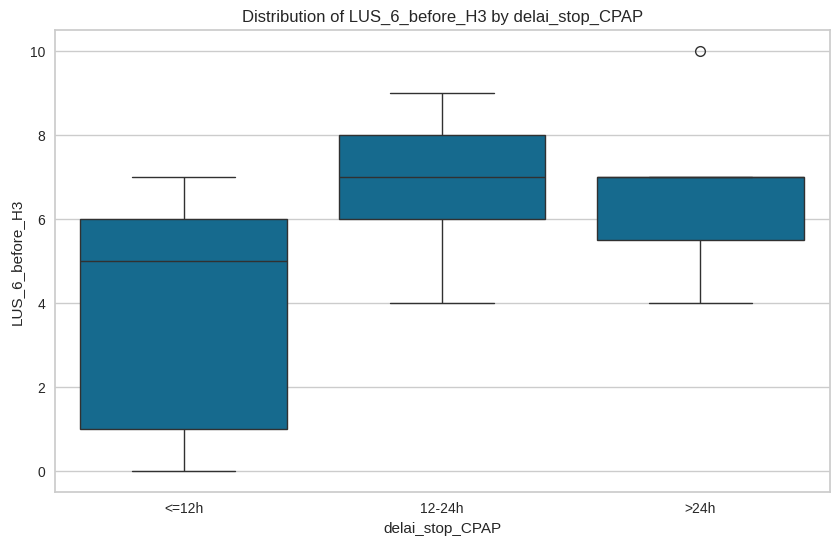

In [65]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.boxplot(x='delai_stop_CPAP', y='LUS_6_before_H3', data=df2)
plt.title('Distribution of LUS_6_before_H3 by delai_stop_CPAP')
plt.xlabel('delai_stop_CPAP')
plt.ylabel('LUS_6_before_H3')
plt.show()

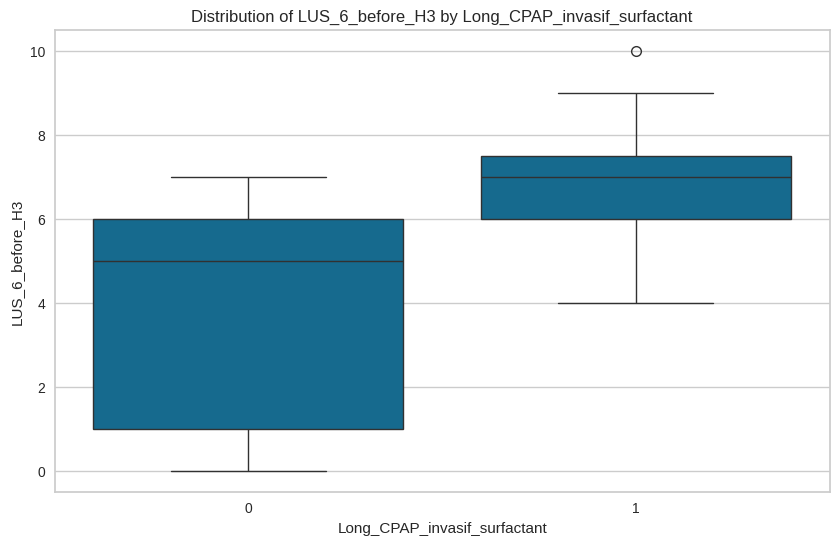

In [66]:
#Correlation score et duree CPAP>12h ou invasif ou surfactant
# create a new column: delai_stop_CPAP >=12 or Invasive =1 or surfactant = oui
df3['Long_CPAP_invasif_surfactant'] = np.where((df3['delai_stop_CPAP_<=12h'] == False) | (df3['Surfactant_oui'] == True) | (df3['Invasive'] == 1), 1, 0)
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

sns.boxplot(x='Long_CPAP_invasif_surfactant', y='LUS_6_before_H3', data=df3)
plt.title('Distribution of LUS_6_before_H3 by Long_CPAP_invasif_surfactant')
plt.xlabel('Long_CPAP_invasif_surfactant')
plt.ylabel('LUS_6_before_H3')
plt.show()

<Axes: >

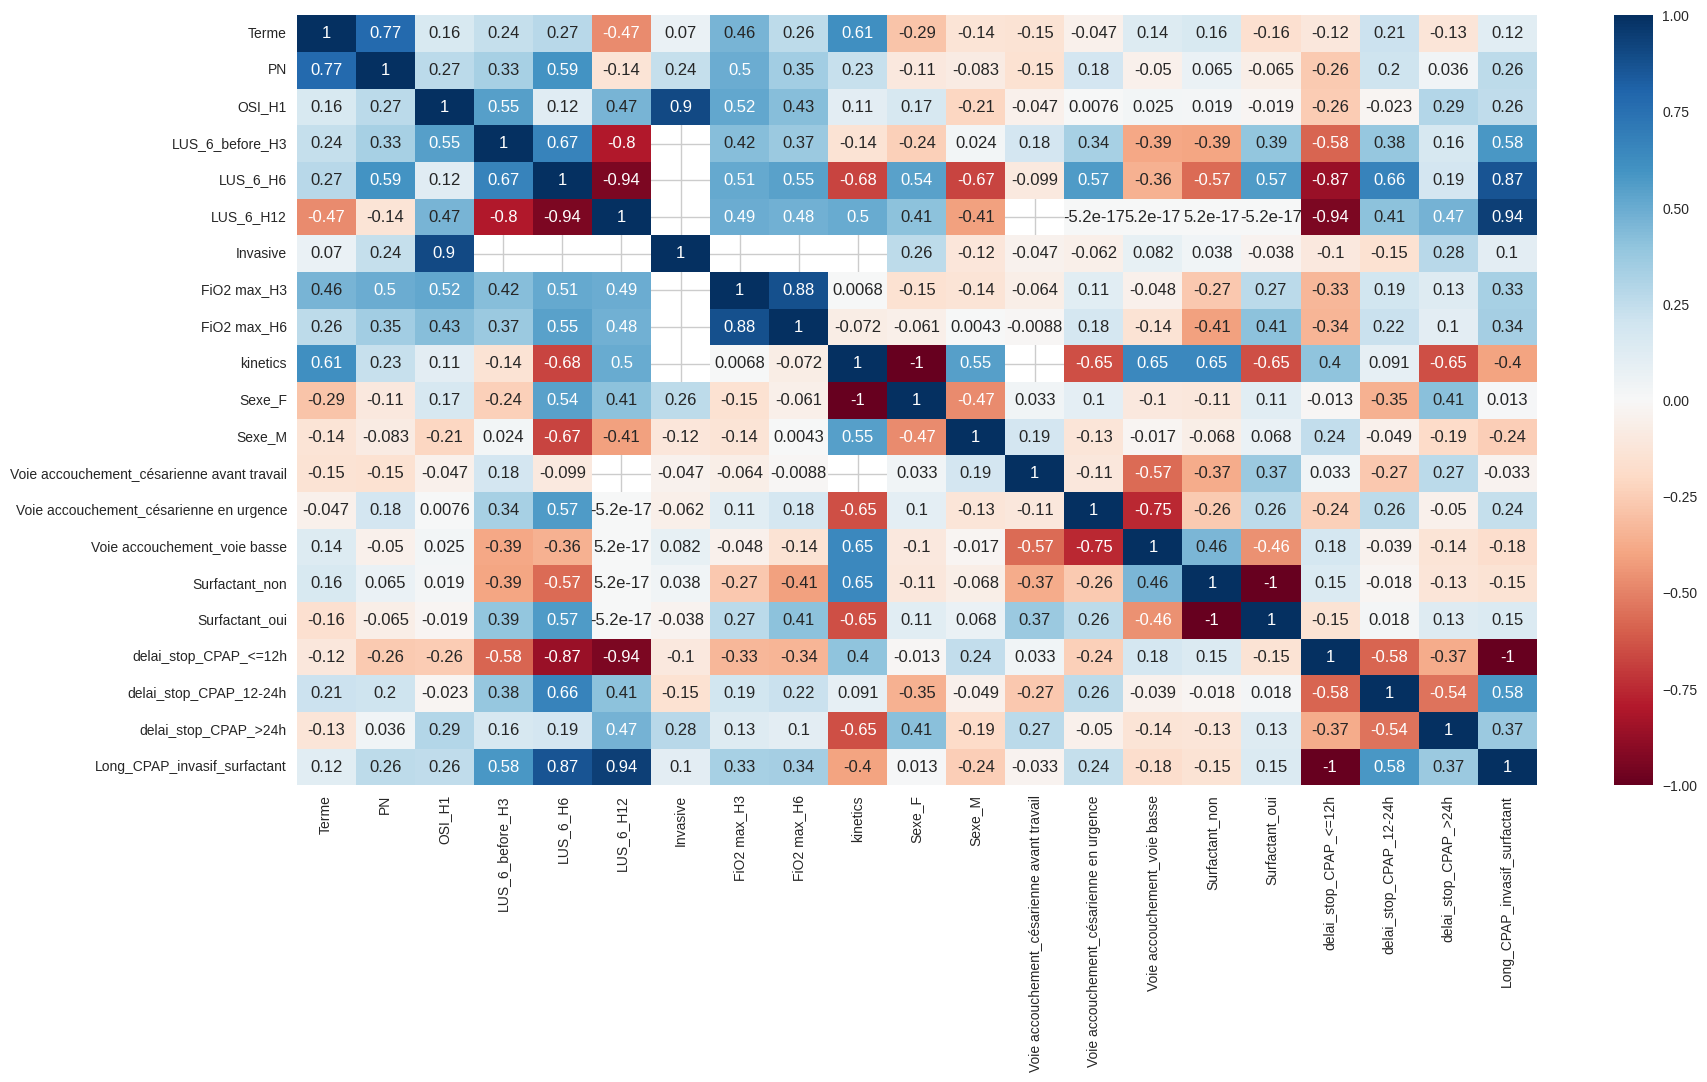

In [67]:
# visualization of correlation between LUS_6_before_H3 and Heure arrêt CPAP  using heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df3.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)

Non colinearity between LUS_6_before_H3 and sexe M, term and kinetics
linear correlation with outcome for sexe_M. No linear correlation for term

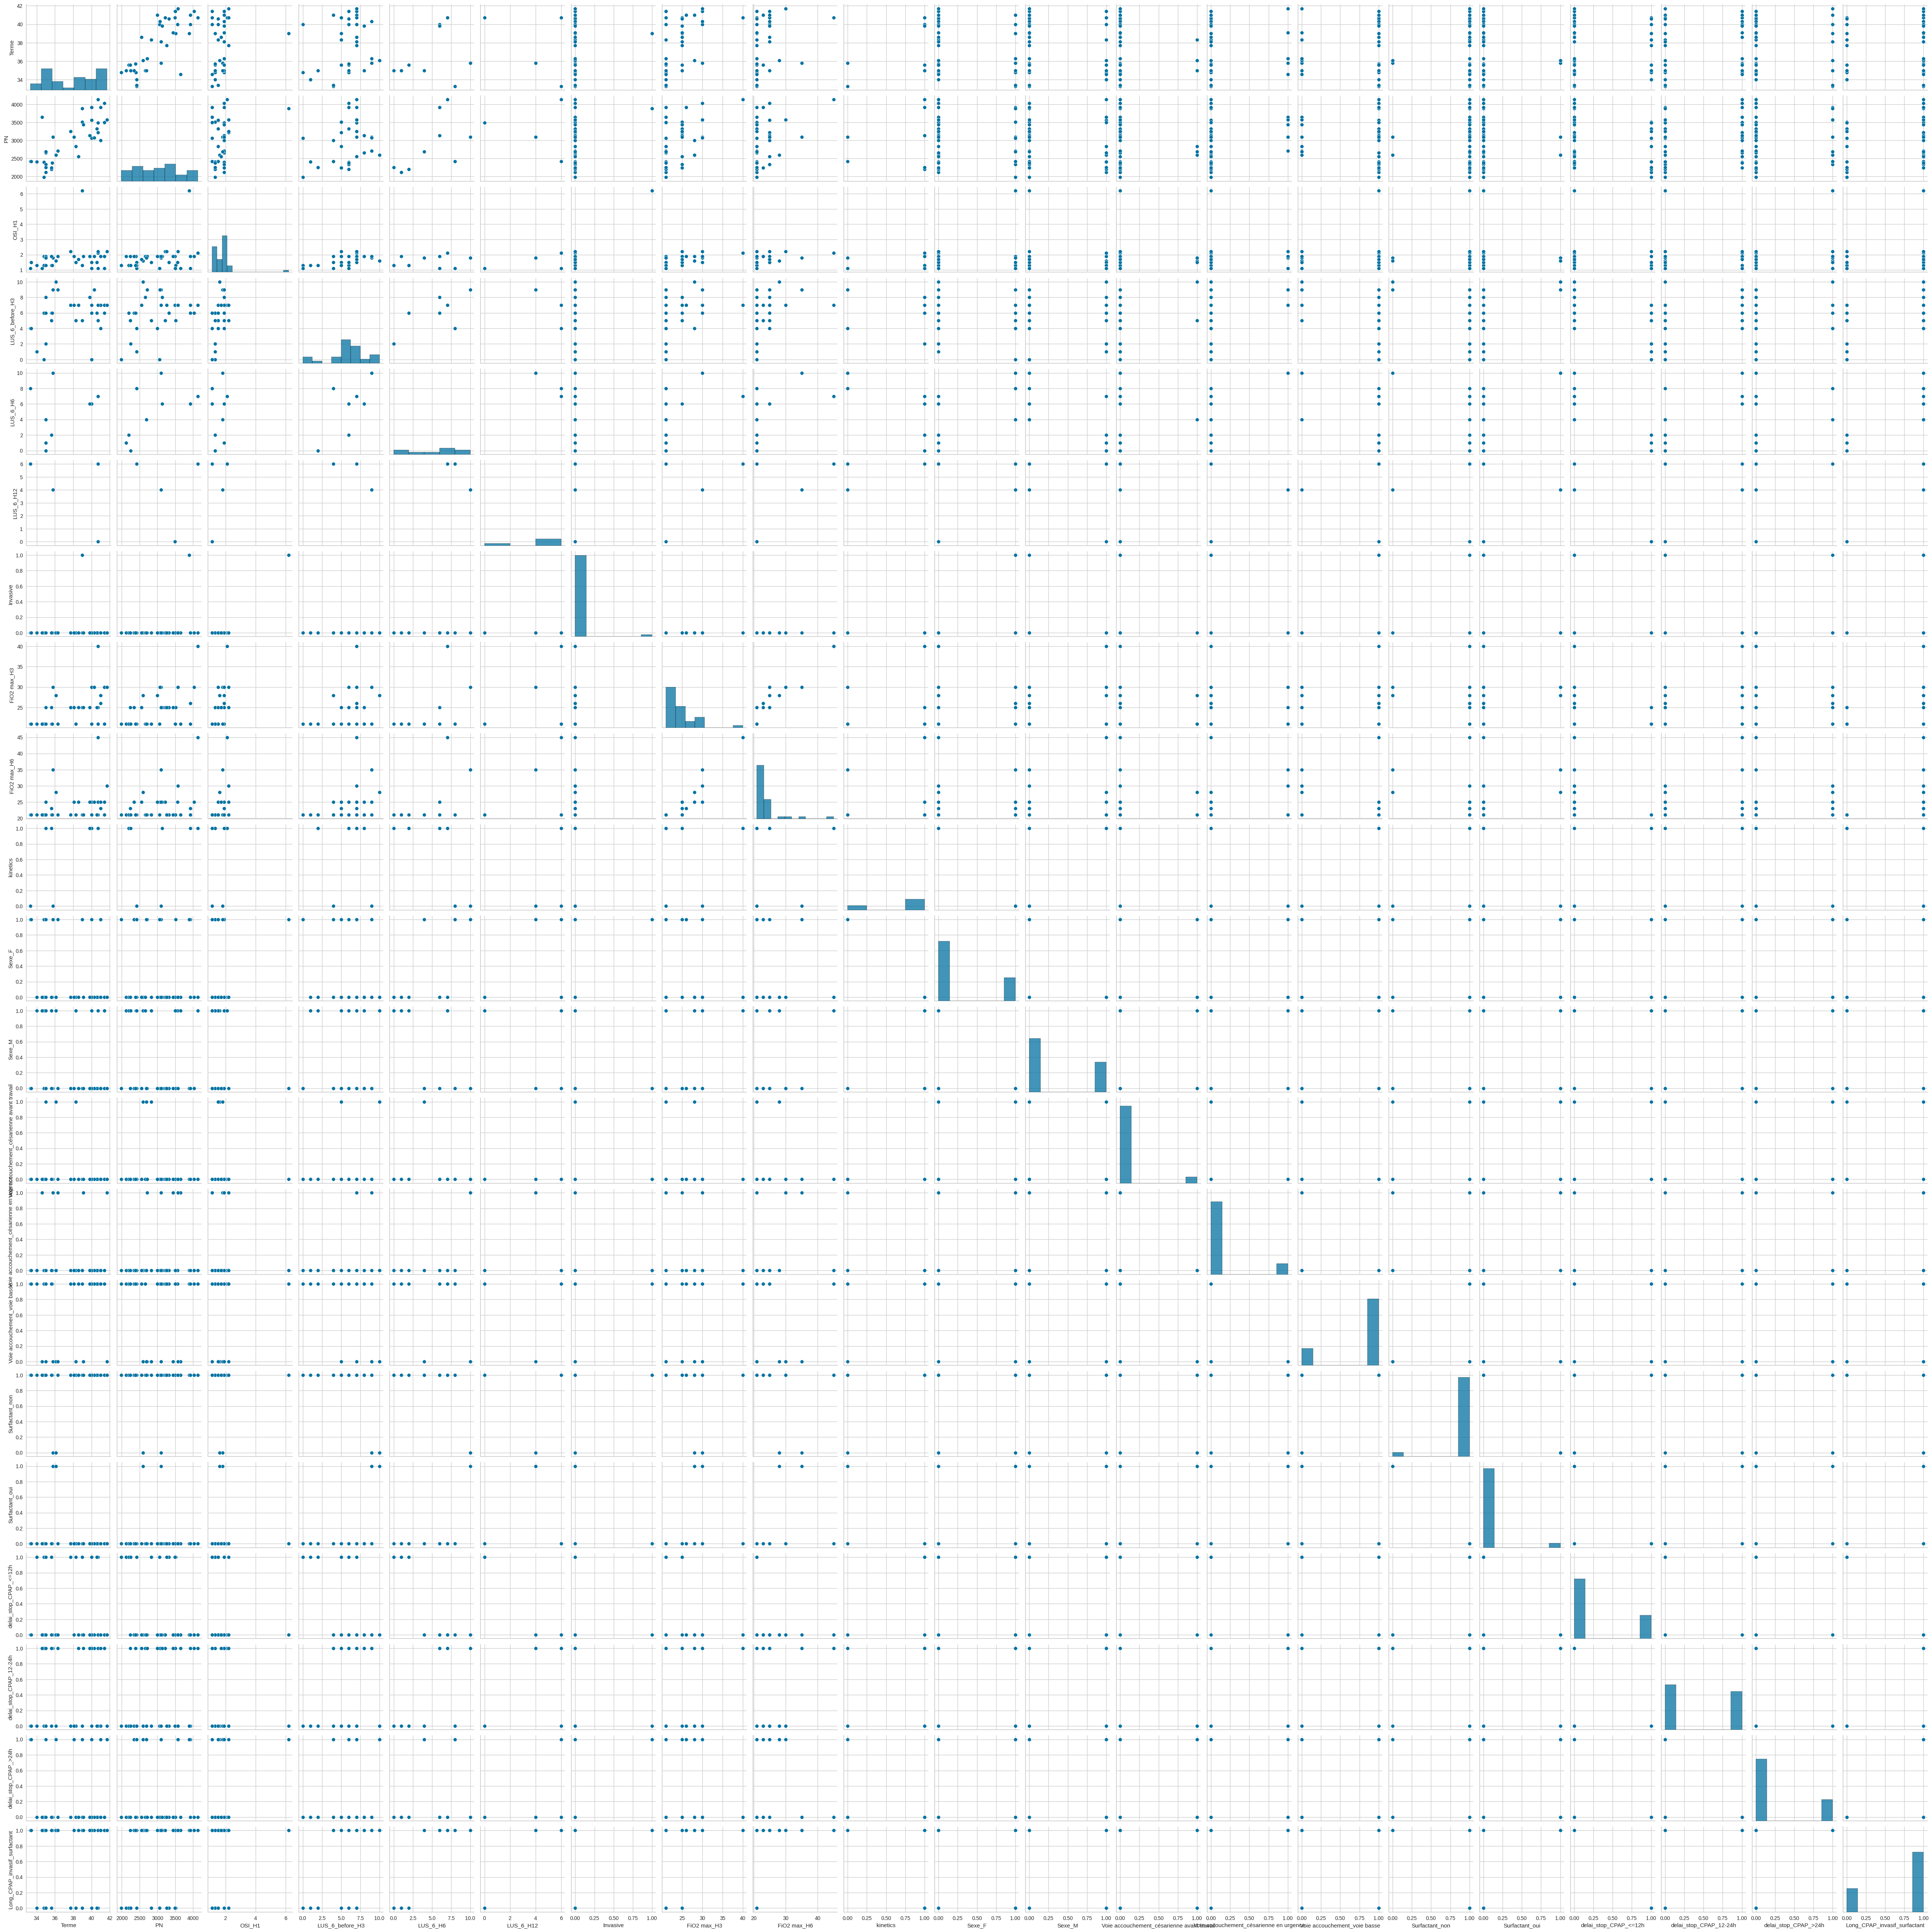

In [110]:
# correlation between all variables: bivariate analysis for numerical values
sns.pairplot(df3, corner= False)
plt.show()

In [ ]:
df3.head()

,OSI_H1,LUS_6_before_H3,LUS_6_H6,LUS_6_H12,delai_stop_CPAP,Surfactant,Invasive,FiO2 max_H3,FiO2 max_H6,kinetics,Long_CPAP_invasif_surfactant
0,1.3,0.0,NaN,NaN,<=12h,non,0,21.0,21.0,NaN,0
1,1.9,6.0,NaN,NaN,12-24h,non,0,21.0,21.0,NaN,1
9,1.8,9.0,10.0,4.0,12-24h,oui,0,30.0,35.0,0.0,1
10,1.6,10.0,NaN,NaN,>24h,oui,0,28.0,28.0,NaN,1
11,1.9,7.0,NaN,NaN,12-24h,non,0,21.0,21.0,NaN,1


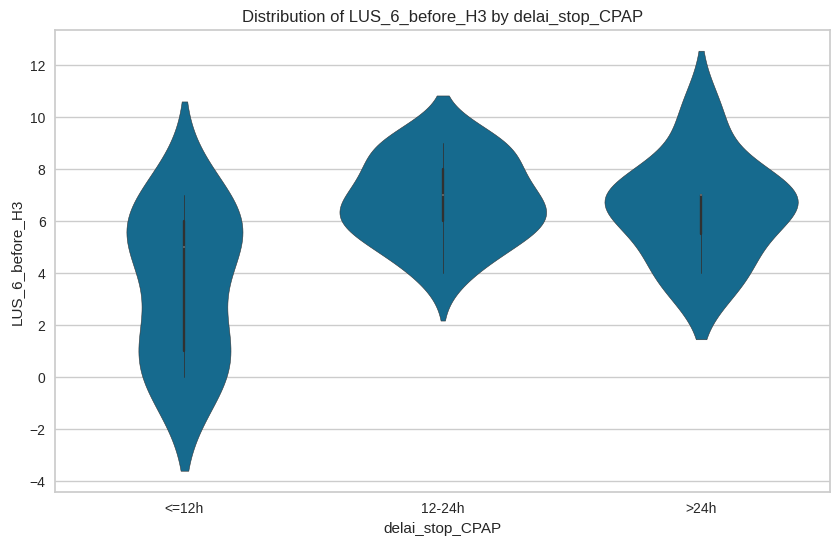

In [ ]:
# same graph using violin plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.violinplot(x='delai_stop_CPAP', y='LUS_6_before_H3', data=df3)
plt.title('Distribution of LUS_6_before_H3 by delai_stop_CPAP')
plt.xlabel('delai_stop_CPAP')
plt.ylabel('LUS_6_before_H3')
plt.show()


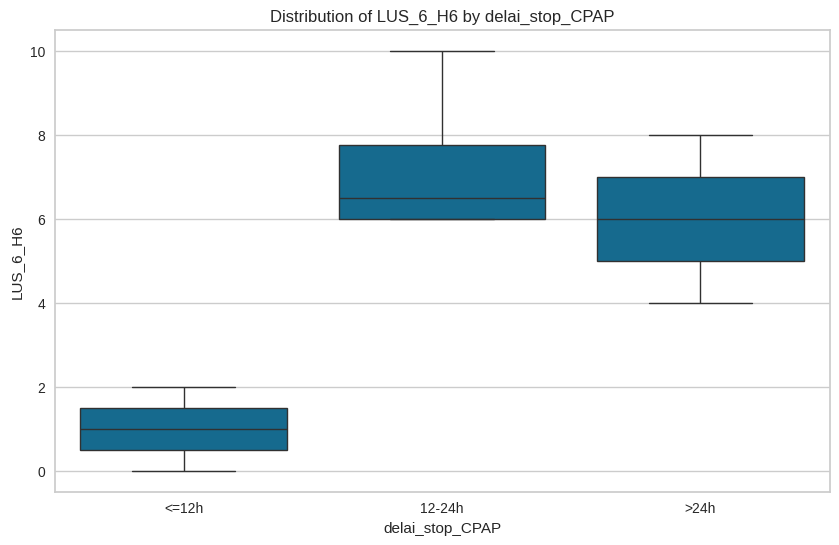

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.boxplot(x='delai_stop_CPAP', y='LUS_6_H6', data=df3)
plt.title('Distribution of LUS_6_H6 by delai_stop_CPAP')
plt.xlabel('delai_stop_CPAP')
plt.ylabel('LUS_6_H6')
plt.show()

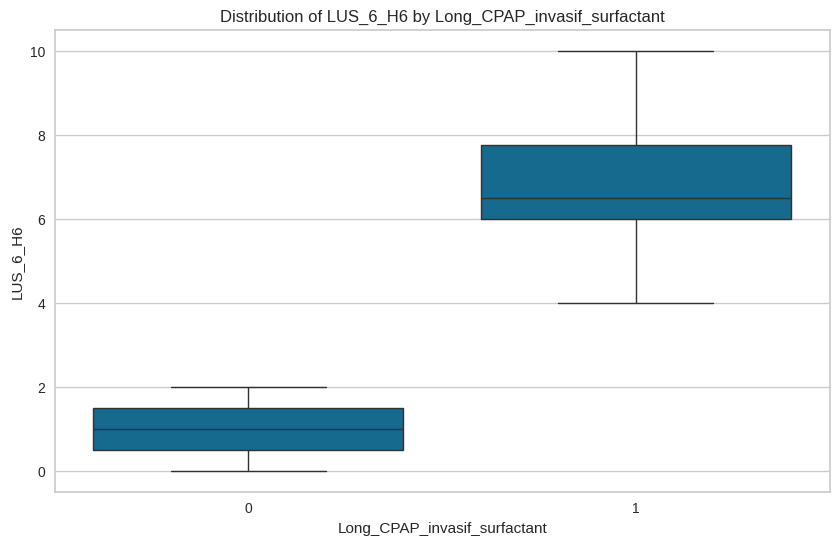

In [ ]:
#Correlation score et duree CPAP>12h ou invasif ou surfactant
# create a new column: delai_stop_CPAP >=12 or Invasive =1 or surfactant = oui
#df3['Long_CPAP_invasif_surfactant'] = np.where((df3['delai_stop_CPAP'] != '<=12h') | (df3['Surfactant'] == 'oui') | (df3['Invasive'] == 1), 1, 0)
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

sns.boxplot(x='Long_CPAP_invasif_surfactant', y='LUS_6_H6', data=df3)
plt.title('Distribution of LUS_6_H6 by Long_CPAP_invasif_surfactant')
plt.xlabel('Long_CPAP_invasif_surfactant')
plt.ylabel('LUS_6_H6')
plt.show()

In [ ]:
df3.describe()

,OSI_H1,LUS_6_before_H3,LUS_6_H6,LUS_6_H12,Invasive,FiO2 max_H3,FiO2 max_H6,kinetics,Long_CPAP_invasif_surfactant
count,39.000000,32.000000,9.000000,4.000000,39.000000,38.000000,38.000000,7.000000,39.000000
mean,1.764103,5.812500,4.888889,4.000000,0.025641,24.236842,23.473684,0.714286,0.717949
std,0.808991,2.455245,3.370625,2.828427,0.160128,4.194167,4.711899,0.487950,0.455881
min,1.100000,0.000000,0.000000,0.000000,0.000000,21.000000,21.000000,0.000000,0.000000
25%,1.300000,5.000000,2.000000,3.000000,0.000000,21.000000,21.000000,0.500000,0.000000
50%,1.800000,6.000000,6.000000,5.000000,0.000000,23.000000,21.000000,1.000000,1.000000
75%,1.900000,7.000000,7.000000,6.000000,0.000000,25.000000,25.000000,1.000000,1.000000
max,6.200000,10.000000,10.000000,6.000000,1.000000,40.000000,45.000000,1.000000,1.000000


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 0 to 65
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   OSI_H1                        39 non-null     float64 
 1   LUS_6_before_H3               32 non-null     float64 
 2   LUS_6_H6                      9 non-null      float64 
 3   LUS_6_H12                     4 non-null      float64 
 4   delai_stop_CPAP               39 non-null     category
 5   Surfactant                    39 non-null     object  
 6   Invasive                      39 non-null     int64   
 7   FiO2 max_H3                   38 non-null     float64 
 8   FiO2 max_H6                   38 non-null     float64 
 9   kinetics                      7 non-null      float64 
 10  Long_CPAP_invasif_surfactant  39 non-null     int64   
dtypes: category(1), float64(7), int64(2), object(1)
memory usage: 3.5+ KB


In [ ]:
df3.head()

,OSI_H1,LUS_6_before_H3,LUS_6_H6,LUS_6_H12,delai_stop_CPAP,Surfactant,Invasive,FiO2 max_H3,FiO2 max_H6,kinetics,Long_CPAP_invasif_surfactant
0,1.3,0.0,NaN,NaN,<=12h,non,0,21.0,21.0,NaN,0
1,1.9,6.0,NaN,NaN,12-24h,non,0,21.0,21.0,NaN,1
9,1.8,9.0,10.0,4.0,12-24h,oui,0,30.0,35.0,0.0,1
10,1.6,10.0,NaN,NaN,>24h,oui,0,28.0,28.0,NaN,1
11,1.9,7.0,NaN,NaN,12-24h,non,0,21.0,21.0,NaN,1


In [ ]:
# count how many rows have Long_CPAP_invasif_surfactant ==1

df3[df3['Long_CPAP_invasif_surfactant'] ==1].count()

,0
OSI_H1,28
LUS_6_before_H3,23
LUS_6_H6,6
LUS_6_H12,3
delai_stop_CPAP,28
Surfactant,28
Invasive,28
FiO2 max_H3,27
FiO2 max_H6,27
kinetics,5


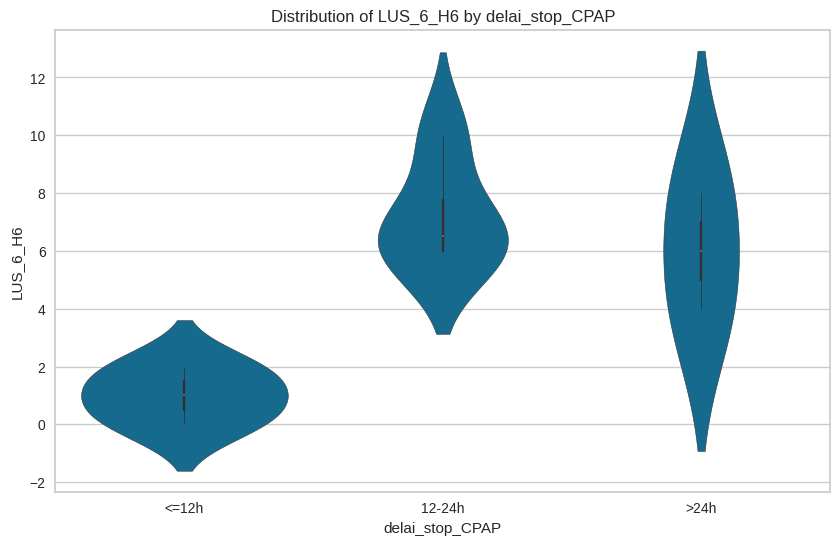

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.violinplot(x='delai_stop_CPAP', y='LUS_6_H6', data=df3)
plt.title('Distribution of LUS_6_H6 by delai_stop_CPAP')
plt.xlabel('delai_stop_CPAP')
plt.ylabel('LUS_6_H6')
plt.show()

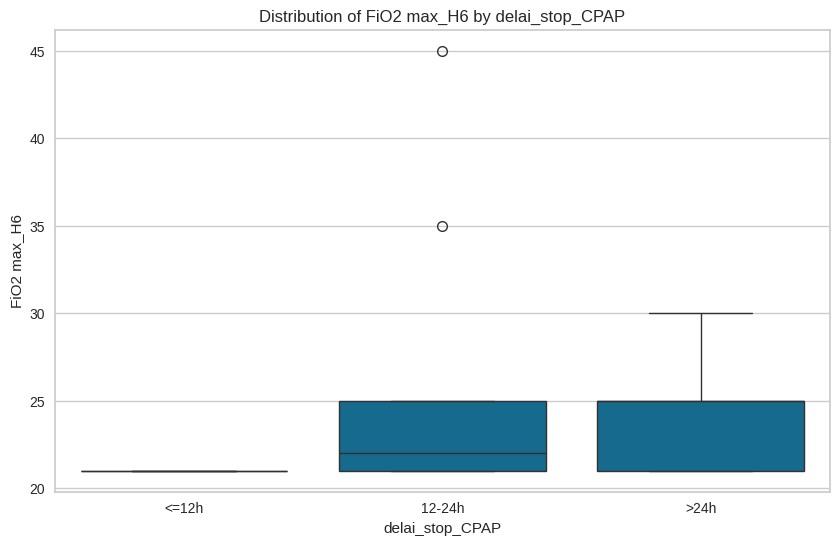

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.boxplot(x='delai_stop_CPAP', y='FiO2 max_H6', data=df3)
plt.title('Distribution of FiO2 max_H6 by delai_stop_CPAP')
plt.xlabel('delai_stop_CPAP')
plt.ylabel('FiO2 max_H6')
plt.show()

ValueError: Could not interpret value `delai_stop_CPAP	` for `x`. An entry with this name does not appear in `data`.

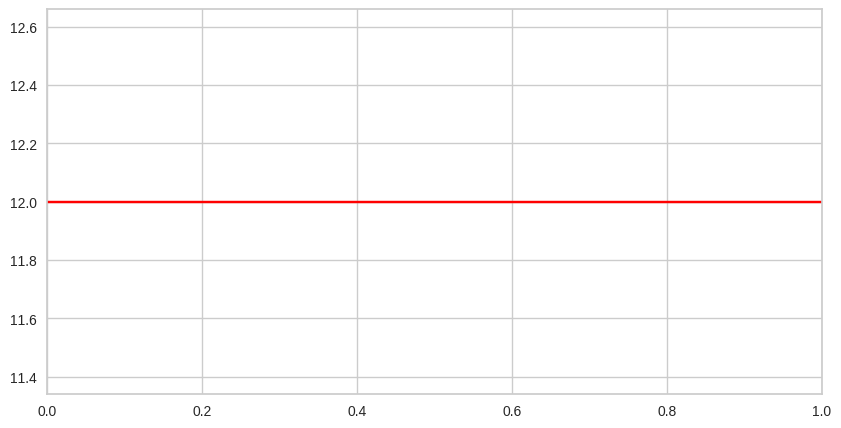

In [ ]:
# Visualization of LUS_6_before H3 and Heure arrêt CPAP
'''plt.figure(figsize=(10,5))
plt.axhline(y=12, color='red')
sns.scatterplot(x='delai_stop_CPAP	', y='LUS_6_before_H3', data=df3)'''

<Axes: xlabel='LUS_6_H6', ylabel='Heure arrêt CPAP'>

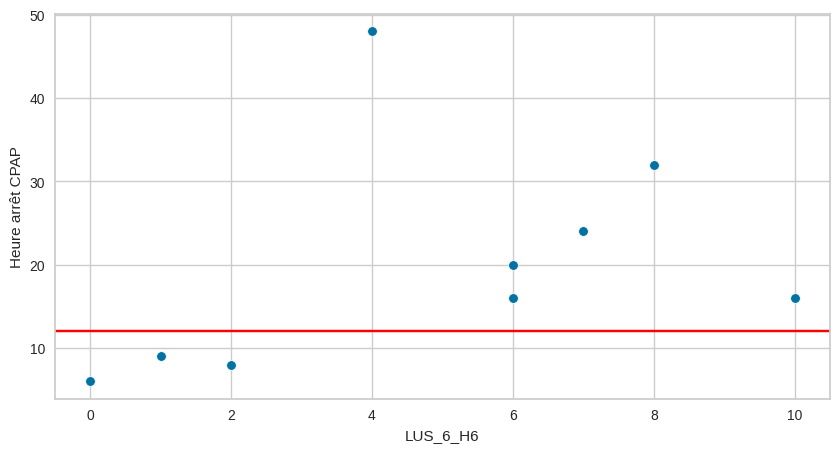

In [ ]:
# Visualization of LUS_6_H6 and Heure arrêt CPAP
plt.figure(figsize=(10,5))
plt.axhline(y=12, color='red')
sns.scatterplot(x='LUS_6_H6', y='Heure arrêt CPAP', data=df2)

<Axes: xlabel='LUS_6_H12', ylabel='Heure arrêt CPAP'>

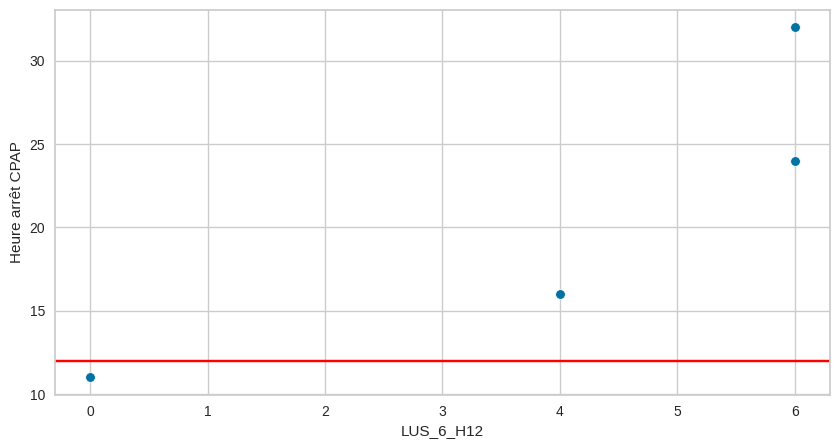

In [ ]:
# Visualization of LUS_6_H12 and Heure arrêt CPAP
plt.figure(figsize=(10,5))
plt.axhline(y=12, color='red')
sns.scatterplot(x='LUS_6_H12', y='Heure arrêt CPAP', data=df2)

<Axes: xlabel='Invasive', ylabel='LUS_6_before_H3'>

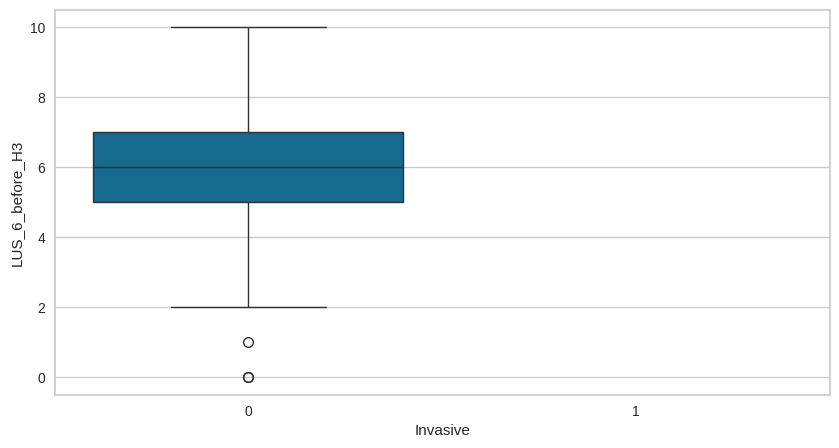

In [ ]:
# Visualization of LUS_6_before H3 and Invasif
plt.figure(figsize=(10,5))
#plt.axhline(y=12, color='red')
sns.boxplot(x='Invasive',y='LUS_6_before_H3', data=df2)

<Axes: xlabel='Invasive', ylabel='LUS_6_H6'>

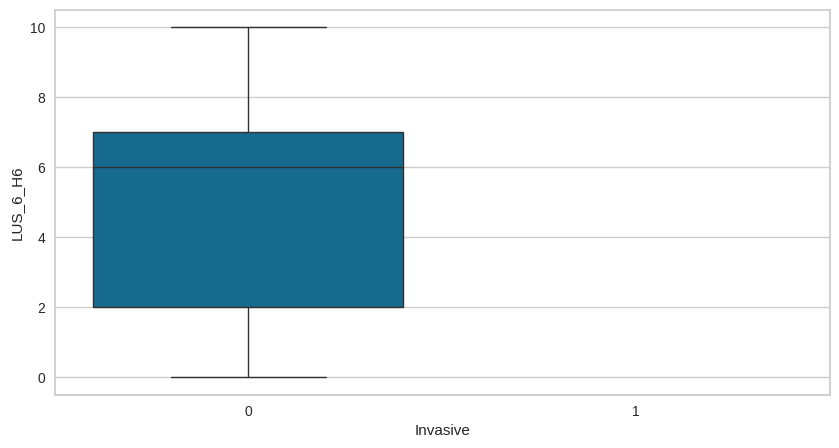

In [ ]:
# Visualization of LUS_6_H6 and Invasif
plt.figure(figsize=(10,5))
#plt.axhline(y=12, color='red')
sns.boxplot(x='Invasive',y='LUS_6_H6', data=df2)

In [ ]:
# create a column for categorical variable

In [ ]:
# for Surfactant column, replace oui by 1 and non by 0
# for Surfactant column, replace oui by 1 and non by 0
df3['Surfactant'] = df3['Surfactant'].replace({'oui': 1, 'non': 0})

In [ ]:
df4 = df3[['OSI_H1','LUS_6_before_H3','LUS_6_H6', 'LUS_6_H12','FiO2 max_H3', 'FiO2 max_H6', 'Long_CPAP_invasif_surfactant','kinetics']]

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 0 to 65
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   OSI_H1                        39 non-null     float64
 1   LUS_6_before_H3               32 non-null     float64
 2   LUS_6_H6                      9 non-null      float64
 3   LUS_6_H12                     4 non-null      float64
 4   FiO2 max_H3                   38 non-null     float64
 5   FiO2 max_H6                   38 non-null     float64
 6   Long_CPAP_invasif_surfactant  39 non-null     int64  
 7   kinetics                      7 non-null      float64
dtypes: float64(7), int64(1)
memory usage: 2.7 KB


<Axes: >

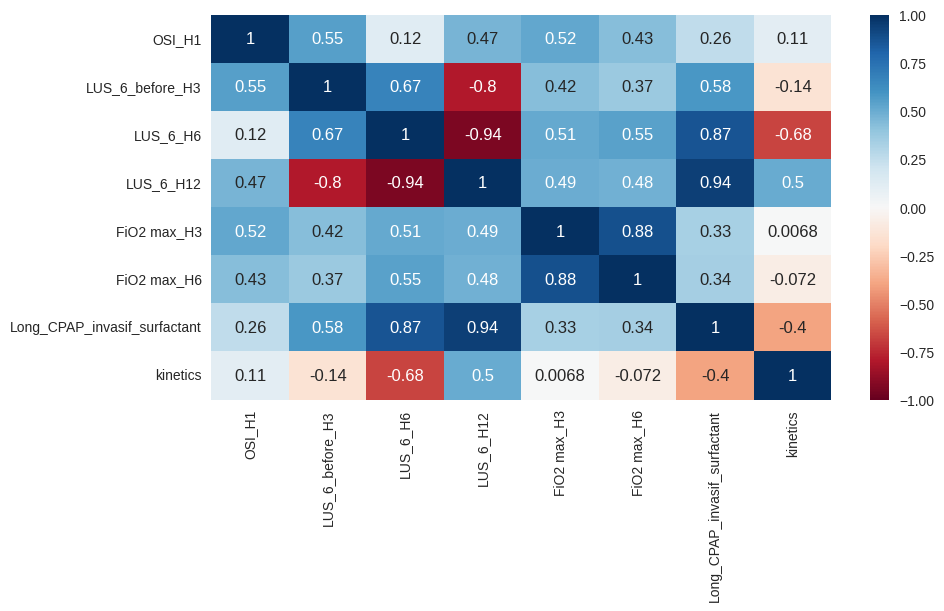

In [ ]:
# visualization of correlation between LUS_6_before_H3 and Heure arrêt CPAP  using heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df4.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)

In [ ]:
# Creat a new column with duration of CPAP >12h
'''df2['CPAP_12_plus'] = np.where(df2['Heure arrêt CPAP'] > 12, 1, 0)
df2.head()'''

,Numéro patient,Lieu naissance,Terme,Sexe,PN,CTC < 15j,Voie accouchement,FiO2 max_H1,PEEP_H1,OSI_H1,...,LUS_6_H48,Outcome,Surfactant,Diagnosis,Heure arrêt CPAP,Unnamed: 46,Unnamed: 47,LUS_6_before_H3,Invasive,CPAP_12_plus
0,1,HFB,34.8,F,1980.0,no,voie basse,<30%,6.0,1.3,...,NaN,Non transféré,non,DRT,5,NaN,NaN,0.0,0,0
1,2,HFB,34.8,M,2400.0,no,voie basse,>=30%,6.0,1.9,...,NaN,Non transféré,non,DRT,15,NaN,NaN,6.0,0,1
20,22,HFB,35.0,M,2120.0,no,voie basse,>=30%,6.0,1.9,...,NaN,Non transféré,non,DRT,9,NaN,NaN,NaN,0,0
21,23,HFB,35.0,F,2340.0,no,voie basse,>=30%,6.0,1.9,...,NaN,Transféré,non,DRT,48,NaN,NaN,6.0,0,1
22,24,HFB,33.3,F,2420.0,yes,voie basse,<30%,5.0,1.1,...,NaN,Transféré,non,DRT,32,NaN,NaN,4.0,0,1


In [ ]:
# find best cut off score for LUS_before H3
'''import numpy as np
cut_off_values = np.arange(df3['LUS_6_before_H3'].min(), df3['LUS_6_before_H3'].max(), 1) # Adjust step size as needed

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

best_cut_off = None
best_score = 0

for cut_off in cut_off_values:
    predictions = (df3['LUS_6_before_H3'] >= cut_off).astype(int)
    score = recall_score(df3['Long_CPAP_invasif_surfactant'], predictions)  # Replace with your chosen metric

    if score > best_score:
        best_score = score
        best_cut_off = cut_off

print(f"Best Cut-off: {best_cut_off}, Best {recall_score.__name__}: {best_score}") # Change metric name if needed'''

Best Cut-off: 0.0, Best recall_score: 0.8214285714285714


In [ ]:
# find best cut off score for LUS_6_H6
'''import numpy as np
cut_off_values = np.arange(df3['LUS_6_H6'].min(), df3['LUS_6_H6'].max(), 1) # Adjust step size as needed

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

best_cut_off = None
best_score = 0

for cut_off in cut_off_values:
    predictions = (df3['LUS_6_H6'] >= cut_off).astype(int)
    score = recall_score(df3['Long_CPAP_invasif_surfactant'], predictions)  # Replace with your chosen metric

    if score > best_score:
        best_score = score
        best_cut_off = cut_off

print(f"Best Cut-off: {best_cut_off}, Best {recall_score.__name__}: {best_score}") # Change metric name if needed'''

Best Cut-off: 0.0, Best recall_score: 0.21428571428571427


In [ ]:
#Youden index for LUS_6_H6
'''import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# ... (previous code for creating binary target and finding best cut-off) ...

# Calculate Youden Index for the best cut-off
fpr, tpr, thresholds = roc_curve(df3['Long_CPAP_invasif_surfactant'], df3['LUS_6_H6'] >= best_cut_off)
youden_index = tpr - fpr
optimal_threshold_index = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_threshold_index]

print(f"Best Cut-off (based on recall): {best_cut_off}, Best {recall_score.__name__}: {best_score}")
print(f"Optimal Threshold (Youden Index): {optimal_threshold}, Youden Index: {youden_index[optimal_threshold_index]}")'''

Best Cut-off (based on recall): 0.0, Best recall_score: 0.21428571428571427
Optimal Threshold (Youden Index): inf, Youden Index: 0.0


In [ ]:
# Metrics for LUS_6_H6
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

# ... (previous code for creating binary target) ...

cut_off = 4  # The specific cut-off value you want to evaluate

# Predictions using the specified cut-off
predictions = (df2['LUS_6_H6'] >= cut_off).astype(int)

# Calculate metrics
accuracy = accuracy_score(df3['Long_CPAP_invasif_surfactant'], predictions)
precision = precision_score(df3['Long_CPAP_invasif_surfactant'], predictions)
recall = recall_score(df3['Long_CPAP_invasif_surfactant'], predictions)
f1 = f1_score(df3['Long_CPAP_invasif_surfactant'], predictions)

# Calculate Youden Index for the specific cut-off
fpr, tpr, thresholds = roc_curve(df3['Long_CPAP_invasif_surfactant'], df3['LUS_6_H6'] >= cut_off)
youden_index = tpr - fpr
# Youden index for the specific cut-off
youden_index_cutoff4 = youden_index[thresholds == cut_off][0] if cut_off in thresholds else np.nan

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(df3['Long_CPAP_invasif_surfactant'], predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Print the performance metrics
print(f"Metrics for Cut-off Score of {cut_off}:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Youden Index: {youden_index_cutoff4}")
print(f"rroc_auc_score: {roc_auc_score}")

Confusion Matrix:
[[11  0]
 [22  6]]
Metrics for Cut-off Score of 4:
Accuracy: 0.4358974358974359
Precision: 1.0
Recall: 0.21428571428571427
F1-Score: 0.35294117647058826
Youden Index: nan
rroc_auc_score: <function roc_auc_score at 0x7a9e27d0f5b0>


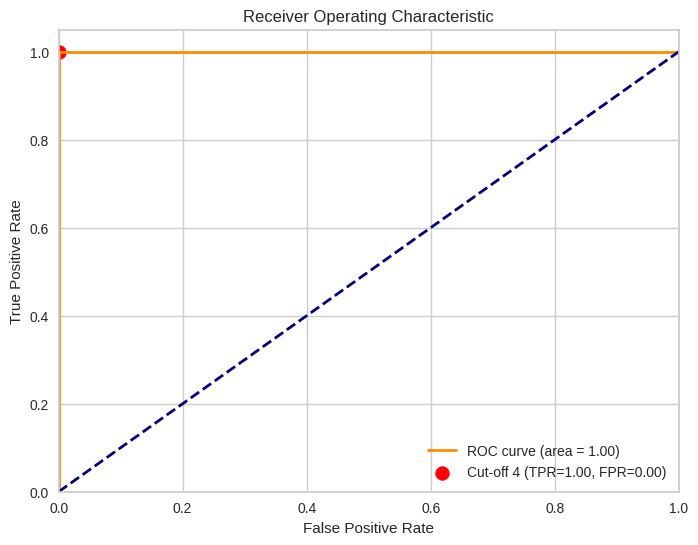

In [ ]:
# ROC curve for LUS_6_H6
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# ... (previous code for creating binary target and predictions) ...

# Calculate ROC curve
df5 = df3.dropna(subset=['Long_CPAP_invasif_surfactant', 'LUS_6_H6'])
fpr, tpr, thresholds = roc_curve(df5['Long_CPAP_invasif_surfactant'], df5['LUS_6_H6'])
roc_auc = auc(fpr, tpr)

# Find the index of the threshold closest to 4
threshold_idx = np.argmin(np.abs(thresholds - 4))

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.scatter(fpr[threshold_idx], tpr[threshold_idx], marker='o', color='red', s=100,
            label=f'Cut-off 4 (TPR={tpr[threshold_idx]:.2f}, FPR={fpr[threshold_idx]:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# create a model that uses LUS_6_before_H3,  to predict Long_CPAP_invasif_surfactant
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report

# Assuming your DataFrame is named 'df3'

# 1. Prepare the data
features = ['LUS_6_before_H3']
target = 'Long_CPAP_invasif_surfactant'
X = df4[features]
y = df4[target]

# 2. Handle missing values (if any)
imputer = SimpleImputer(strategy='mean')  # Or other strategy like 'median'
X = imputer.fit_transform(X)

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# 4. Create and train the model
model = LogisticRegression()  # Choose a suitable model (e.g., Logistic Regression, Random Forest, etc.)
model.fit(X_train, y_train)

# 5. Make predictions on the test set
y_pred = model.predict(X_test)

# 6. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Display the model coefficients and intercept
print("\nModel Coefficients:")
for feature, coefficient in zip(features, model.coef_[0]):
    print(f"{feature}: {coefficient}")
print(f"Intercept: {model.intercept_[0]}")

Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.75      1.00      0.86         6

    accuracy                           0.75         8
   macro avg       0.38      0.50      0.43         8
weighted avg       0.56      0.75      0.64         8


Model Coefficients:
LUS_6_before_H3: 0.6930914721208219
Intercept: -2.770259334285718


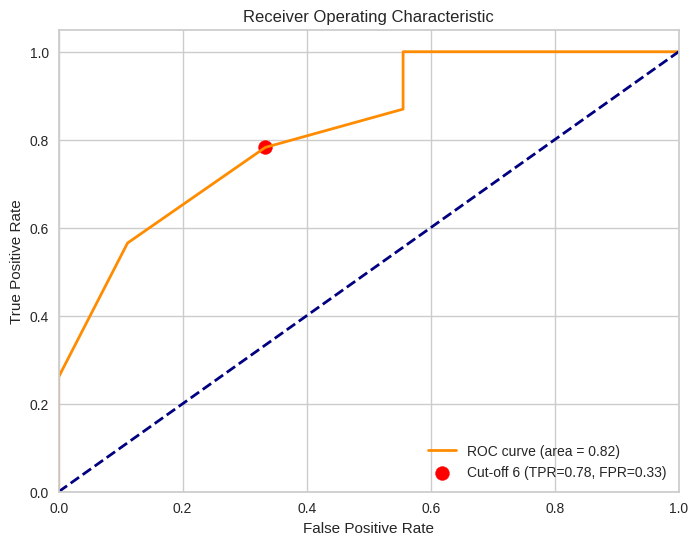

In [74]:
# ROC curve for LUS_6_before_H3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# ... (previous code for creating binary target and predictions) ...

# Calculate ROC curve
df6 = df3.dropna(subset=['Long_CPAP_invasif_surfactant', 'LUS_6_before_H3'])
fpr, tpr, thresholds = roc_curve(df6['Long_CPAP_invasif_surfactant'], df6['LUS_6_before_H3'])
roc_auc = auc(fpr, tpr)

# Find the index of the threshold closest to 6
threshold_idx = np.argmin(np.abs(thresholds - 6))

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.scatter(fpr[threshold_idx], tpr[threshold_idx], marker='o', color='red', s=100,
            label=f'Cut-off 6 (TPR={tpr[threshold_idx]:.2f}, FPR={fpr[threshold_idx]:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

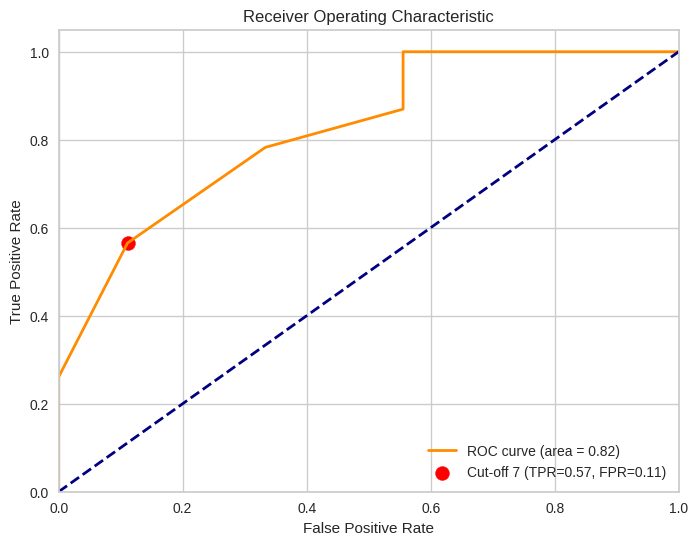

In [202]:
# ROC curve for LUS_6_before_H3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# ... (previous code for creating binary target and predictions) ...

# Calculate ROC curve
df6 = df3.dropna(subset=['Long_CPAP_invasif_surfactant', 'LUS_6_before_H3'])
fpr, tpr, thresholds = roc_curve(df6['Long_CPAP_invasif_surfactant'], df6['LUS_6_before_H3'])
roc_auc = auc(fpr, tpr)

# Find the index of the threshold closest to 7
threshold_idx = np.argmin(np.abs(thresholds - 7))

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.scatter(fpr[threshold_idx], tpr[threshold_idx], marker='o', color='red', s=100,
            label=f'Cut-off 7 (TPR={tpr[threshold_idx]:.2f}, FPR={fpr[threshold_idx]:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Assuming your DataFrame is named 'df3' or 'df4'
# Choose the DataFrame containing your desired features and target

# 1. Prepare the data
feature = 'LUS_6_before_H3'
target = 'Long_CPAP_invasif_surfactant'
cut_off = 6

# Check if the columns exist in df4, if not, try df3
'''if all(col in df4.columns for col in [feature, target]):
    df = df4
elif all(col in df3.columns for col in [feature, target]):
    print("Using df3 as df4 does not contain all necessary columns.")
    df = df3
else:
    raise KeyError(f"Columns {[feature, target]} not found in either df3 or df4.")'''

# 2. Create predictions using the cut-off score
predictions = (df4[feature] >= cut_off).astype(int)

# 3. Calculate confusion matrix
conf_matrix = confusion_matrix(df4[target], predictions)

# 4. Extract values from confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# 5. Calculate sensitivity and specificity
sensitivity = TP / (TP + FN)  # Also known as recall or True Positive Rate
specificity = TN / (TN + FP)  # Also known as True Negative Rate

# 6. Print the results
print(f"Sensitivity (cut-off = {cut_off}): {sensitivity:.2f}")
print(f"Specificity (cut-off = {cut_off}): {specificity:.2f}")

Sensitivity (cut-off = 6): 0.64
Specificity (cut-off = 6): 0.73


In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Assuming your DataFrame is named 'df3' or 'df4'
# Choose the DataFrame containing your desired features and target

# 1. Prepare the data
feature = 'LUS_6_before_H3'
target = 'Long_CPAP_invasif_surfactant'
cut_off = 7

# Check if the columns exist in df4, if not, try df3
'''if all(col in df4.columns for col in [feature, target]):
    df = df4
elif all(col in df3.columns for col in [feature, target]):
    print("Using df3 as df4 does not contain all necessary columns.")
    df = df3
else:
    raise KeyError(f"Columns {[feature, target]} not found in either df3 or df4.")'''

# 2. Create predictions using the cut-off score
predictions = (df4[feature] >= cut_off).astype(int)

# 3. Calculate confusion matrix
conf_matrix = confusion_matrix(df4[target], predictions)

# 4. Extract values from confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# 5. Calculate sensitivity and specificity
sensitivity = TP / (TP + FN)  # Also known as recall or True Positive Rate
specificity = TN / (TN + FP)  # Also known as True Negative Rate

# 6. Print the results
print(f"Sensitivity (cut-off = {cut_off}): {sensitivity:.2f}")
print(f"Specificity (cut-off = {cut_off}): {specificity:.2f}")

Sensitivity (cut-off = 7): 0.46
Specificity (cut-off = 7): 0.91


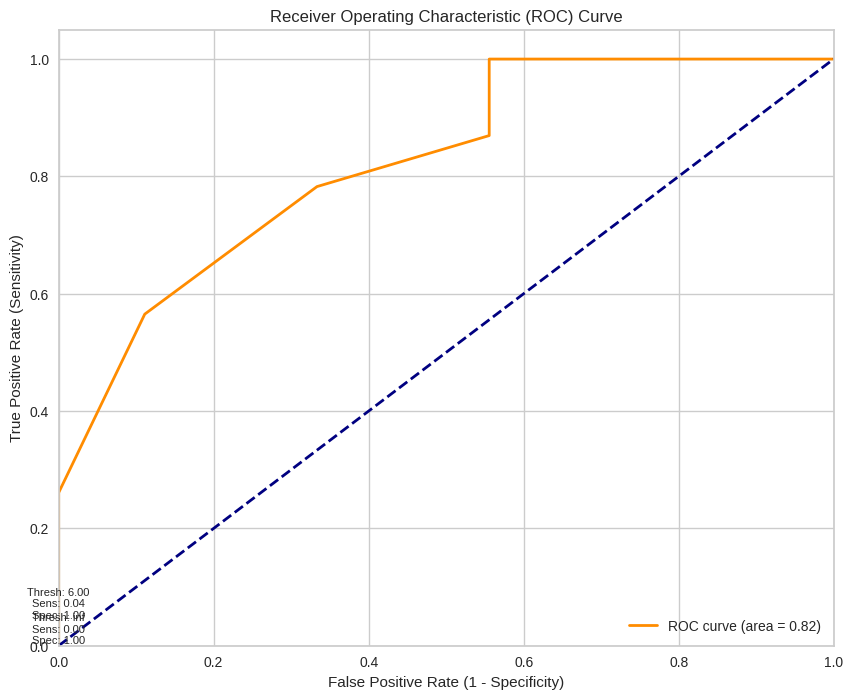

In [ ]:
# rimport pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have your data in a DataFrame 'df' with columns 'LUS_6_before_H3' and 'Long_CPAP_invasif_surfactant'

# 1. Prepare the data
feature = 'LUS_6_before_H3'
target = 'Long_CPAP_invasif_surfactant'

X = df6[[feature]]
y = df6[target]

# 2. Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y, X)
roc_auc = auc(fpr, tpr)

# 3. Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random classifier)

# 4. Annotate with sensitivity and specificity for some thresholds
for i, threshold in enumerate(thresholds[::5]):  # Annotate every 5th threshold for clarity
    # Calculate specificity
    specificity = 1 - fpr[i]
    plt.text(fpr[i], tpr[i], f'Thresh: {threshold:.2f}\nSens: {tpr[i]:.2f}\nSpec: {specificity:.2f}',
             ha='center', va='bottom', fontsize=8)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show('roc curve with sensitivity and specificity')


In [ ]:
# exploring 6 as best cut off score for LUS before H3 and metrics

import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

# ... (previous code for creating binary target) ...

cut_off = 6  # The specific cut-off value you want to evaluate

# Predictions using the specified cut-off
predictions = (df2['LUS_6_before_H3'] >= cut_off).astype(int)

# Calculate metrics
accuracy = accuracy_score(df3['Long_CPAP_invasif_surfactant'], predictions)
precision = precision_score(df3['Long_CPAP_invasif_surfactant'], predictions)
recall = recall_score(df3['Long_CPAP_invasif_surfactant'], predictions)
f1 = f1_score(df3['Long_CPAP_invasif_surfactant'], predictions)

# Calculate Youden Index for the specific cut-off
fpr, tpr, thresholds = roc_curve(df3['Long_CPAP_invasif_surfactant'], df3['LUS_6_before_H3'] >= cut_off)
youden_index = tpr - fpr
# Youden index for the specific cut-off
youden_index_cutoff4 = youden_index[thresholds == cut_off][0] if cut_off in thresholds else np.nan

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(df3['Long_CPAP_invasif_surfactant'], predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Print the performance metrics
print(f"Metrics for Cut-off Score of {cut_off}:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Youden Index: {youden_index_cutoff4}")
print(f"rroc_auc_score: {roc_auc_score}")

Confusion Matrix:
[[ 8  3]
 [10 18]]
Metrics for Cut-off Score of 6:
Accuracy: 0.6666666666666666
Precision: 0.8571428571428571
Recall: 0.6428571428571429
F1-Score: 0.7346938775510204
Youden Index: nan
rroc_auc_score: <function roc_auc_score at 0x7d3a6ca6b640>


In [ ]:
# exploring 7 as best cut off score for LUS before H3 and metrics

import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

# ... (previous code for creating binary target) ...

cut_off = 7  # The specific cut-off value you want to evaluate

# Predictions using the specified cut-off
predictions = (df2['LUS_6_before_H3'] >= cut_off).astype(int)

# Calculate metrics
accuracy = accuracy_score(df3['Long_CPAP_invasif_surfactant'], predictions)
precision = precision_score(df3['Long_CPAP_invasif_surfactant'], predictions)
recall = recall_score(df3['Long_CPAP_invasif_surfactant'], predictions)
f1 = f1_score(df3['Long_CPAP_invasif_surfactant'], predictions)

# Calculate Youden Index for the specific cut-off
fpr, tpr, thresholds = roc_curve(df3['Long_CPAP_invasif_surfactant'], df3['LUS_6_before_H3'] >= cut_off)
youden_index = tpr - fpr
# Youden index for the specific cut-off
youden_index_cutoff4 = youden_index[thresholds == cut_off][0] if cut_off in thresholds else np.nan

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(df3['Long_CPAP_invasif_surfactant'], predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Print the performance metrics
print(f"Metrics for Cut-off Score of {cut_off}:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Youden Index: {youden_index_cutoff4}")
print(f"rroc_auc_score: {roc_auc_score}")

Confusion Matrix:
[[10  1]
 [15 13]]
Metrics for Cut-off Score of 7:
Accuracy: 0.5897435897435898
Precision: 0.9285714285714286
Recall: 0.4642857142857143
F1-Score: 0.6190476190476191
Youden Index: nan
rroc_auc_score: <function roc_auc_score at 0x7a9e27d0f5b0>


In [ ]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 0 to 65
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   OSI_H1                        32 non-null     float64
 1   LUS_6_before_H3               32 non-null     float64
 2   LUS_6_H6                      7 non-null      float64
 3   LUS_6_H12                     3 non-null      float64
 4   Surfactant                    32 non-null     int64  
 5   FiO2 max_H3                   32 non-null     float64
 6   FiO2 max_H6                   32 non-null     float64
 7   Long_CPAP_invasif_surfactant  32 non-null     int64  
 8   kinetics                      7 non-null      float64
dtypes: float64(7), int64(2)
memory usage: 2.5 KB


In [172]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix

# Assuming your DataFrame is named 'df3' or 'df4'
# Choose the DataFrame containing your desired features and target

# 1. Prepare the data
features = ['LUS_6_before_H3','FiO2 max_H3','Terme']
target = 'Long_CPAP_invasif_surfactant'
cut_off = 7

# Check if the columns exist in df4, if not, try df3
'''if all(col in df4.columns for col in features + [target]):
    df = df4
elif all(col in df3.columns for col in features + [target]):
    print("Using df3 as df4 does not contain all necessary columns.")
    df = df3
else:
    raise KeyError(f"Columns {features + [target]} not found in either df3 or df4.")'''

X = df6[features]
y = df6[target]

# 2. Handle missing values (if any)
imputer = SimpleImputer(strategy='mean')  # Or other strategy like 'median'
X = imputer.fit_transform(X)

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# 5. Make predictions on the test set using the cut-off score for LUS_6_before_H3
# We'll use the model's predicted probabilities and the cut-off
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Combine model predictions with cut-off rule for LUS_6_before_H3
lus_predictions = (X_test[:, 0] >= cut_off).astype(int)  # Predictions based on LUS_6_before_H3
combined_predictions = np.where(lus_predictions == 1, 1, (y_probs >= 0.5).astype(int))

# 6. Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, combined_predictions)

# 7. Extract values from confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# 8. Calculate sensitivity and specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# 9. Print the results
print(f"Sensitivity (LUS_6_before_H3 cut-off = {cut_off}): {sensitivity:.2f}")
print(f"Specificity (LUS_6_before_H3 cut-off = {cut_off}): {specificity:.2f}")

# 5. Get coefficients and intercept
coefficients = model.coef_[0]
intercept = model.intercept_[0]

# 6. Print the results
print("Coefficients:")
for feature, coefficient in zip(features, coefficients):
    print(f"{feature}: {coefficient:.2f}")
print(f"Intercept: {intercept:.2f}")

Sensitivity (LUS_6_before_H3 cut-off = 7): 0.83
Specificity (LUS_6_before_H3 cut-off = 7): 1.00
Coefficients:
LUS_6_before_H3: 0.56
FiO2 max_H3: 0.18
Terme: -0.11
Intercept: -2.41


In [169]:
!pip install scikit-learn

import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming 'df' is your DataFrame containing 'LUS_6_before_H3' and the outcome variable
# Replace 'outcome_variable' with the actual name of your outcome column

# 1. Define outcome variable
y_true = df6['Long_CPAP_invasif_surfactant']
X = df6['LUS_6_before_H3']

# 2. Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true, X)

# 3. Calculate Youden's J statistic
J = tpr - fpr

# 4. Find optimal cut-off
optimal_idx = np.argmax(J)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Cut-off Score: {optimal_threshold}")
print(f"Youden's J Statistic: {J[optimal_idx]}")

Optimal Cut-off Score: 7.0
Youden's J Statistic: 0.4541062801932367


In [170]:
# 6. Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# 7. Calculate Youden Index for each threshold
youden_indices = tpr - fpr

# 8. Find the optimal threshold
optimal_threshold_index = np.argmax(youden_indices)
optimal_threshold = thresholds[optimal_threshold_index]

# 9. Print the optimal threshold and corresponding Youden Index
print(f"Optimal Threshold (Youden Index): {optimal_threshold:.2f}")
print(f"Youden Index: {youden_indices[optimal_threshold_index]:.2f}")

# You can now use this optimal threshold for classification:
y_pred = (y_probs >= optimal_threshold).astype(int)

Optimal Threshold (Youden Index): 0.48
Youden Index: 1.00


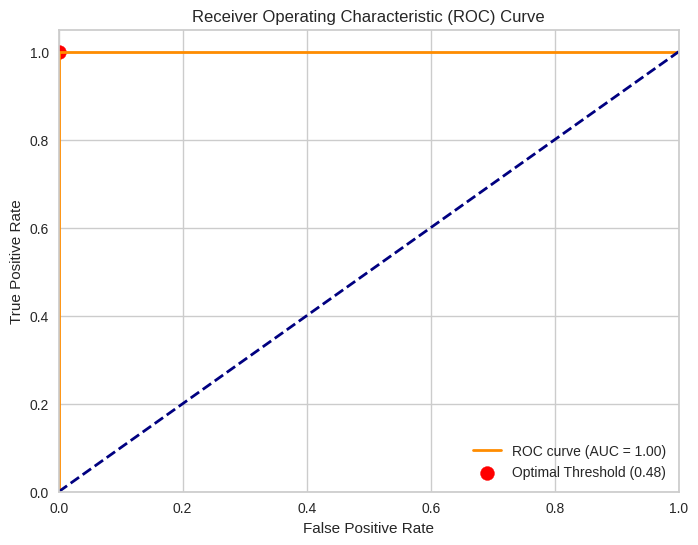

In [168]:
# 10. Plot ROC curve with optimal threshold
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], marker='o', color='red', s=100,
            label=f'Optimal Threshold ({optimal_threshold:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [91]:
LUS_6_before_H3 = int(input("Enter LUS_6_before_H3 value: "))
Sexe_M = int(input("Enter Sexe_M value: "))
kinetics = int(input("Enter kinetics value: "))

predict = -2.24 + 0.6*LUS_6_before_H3 - 0.41*kinetics

probability = 1/(1+np.exp(-predict))

if probability > 0.49:
    print("The patient will receive CPAP longer than 12h")
else:
    print("The patient will not receive CPAP more than 12h")

print(probability)




Enter LUS_6_before_H3 value: 4
Enter Sexe_M value: 0
Enter kinetics value: 1
The patient will not receive CPAP more than 12h
0.4378234991142018


In [161]:
LUS_6_before_H3 = int(input("Enter LUS_6_before_H3 value: "))
FiO2_max_H3 = int(input("Enter FiO2 max_H3 value: "))
Terme= int(input("Enter Terme value: "))

predict = -2.41 + 0.56*LUS_6_before_H3 + 0.18*FiO2_max_H3 - 0.11*Terme

probability = 1/(1+np.exp(-predict))

if probability > 0.49:
    print("The patient will receive CPAP longer than 12h")
else:
    print("The patient will not receive CPAP more than 12h")

print(probability)



Enter LUS_6_before_H3 value: 4
Enter FiO2 max_H3 value: 23
Enter Terme value: 38
The patient will not receive CPAP more than 12h
0.4476920904256748


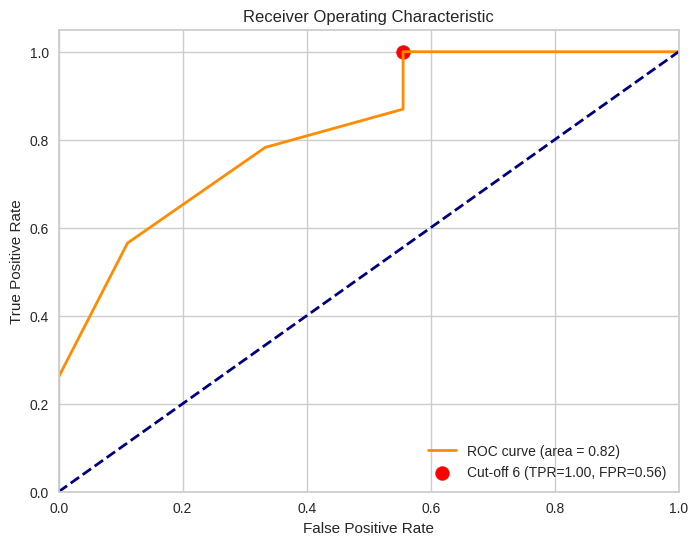

In [ ]:
# ROC curve for LUS_6_before_H3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# ... (previous code for creating binary target and predictions) ...

# Calculate ROC curve
df6 = df3.dropna(subset=['Long_CPAP_invasif_surfactant', 'LUS_6_before_H3'])
fpr, tpr, thresholds = roc_curve(df6['Long_CPAP_invasif_surfactant'], df6['LUS_6_before_H3'])
roc_auc = auc(fpr, tpr)

# Find the index of the threshold closest to 4
threshold_idx = np.argmin(np.abs(thresholds - 4))

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.scatter(fpr[threshold_idx], tpr[threshold_idx], marker='o', color='red', s=100,
            label=f'Cut-off 6 (TPR={tpr[threshold_idx]:.2f}, FPR={fpr[threshold_idx]:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [183]:
df7 = df6[['Terme','LUS_6_before_H3','FiO2 max_H3','Long_CPAP_invasif_surfactant']]

In [184]:
X = df7
y = df7['Long_CPAP_invasif_surfactant']
std = preprocessing.StandardScaler()
X_std= pd.DataFrame(std.fit_transform(X), columns=X.columns)
X_std

,Terme,LUS_6_before_H3,FiO2 max_H3,Long_CPAP_invasif_surfactant
0,-1.126375,-2.405262,-0.865712,-1.598611
1,-1.126375,0.077589,-0.865712,0.625543
2,-0.755170,1.319015,1.229457,0.625543
3,-0.643809,1.732823,0.763864,0.625543
4,1.323578,0.491398,-0.865712,0.625543
5,-1.052134,0.905206,-0.865712,0.625543
6,-0.569568,1.319015,-0.865712,0.625543
7,0.172842,-0.336219,-0.865712,-1.598611
8,1.175096,0.491398,0.298271,0.625543
9,-1.052134,0.077589,0.065474,0.625543


In [185]:
# Creating copy of the data to store labels from each algorithm
data_scaled_copy = X_std.copy(deep = True)
data_scaled_copy.head()

,Terme,LUS_6_before_H3,FiO2 max_H3,Long_CPAP_invasif_surfactant
0,-1.126375,-2.405262,-0.865712,-1.598611
1,-1.126375,0.077589,-0.865712,0.625543
2,-0.755170,1.319015,1.229457,0.625543
3,-0.643809,1.732823,0.763864,0.625543
4,1.323578,0.491398,-0.865712,0.625543


In [186]:
# Importing PCA and t-SNE
from sklearn.decomposition import PCA

# Defining the number of principal components to generate
n = data_scaled_copy.shape[1]

# Finding principal components for the data
pca1 = PCA(n_components = n, random_state = 42)
data_scaled_copy_pca = pd.DataFrame(pca1.fit_transform(data_scaled_copy))

data_scaled_copy_pca

# The percentage of variance explained by each principal component
exp_var1 = pca1.explained_variance_ratio_
exp_var1

array([0.53441135, 0.25282981, 0.11103861, 0.10172023])

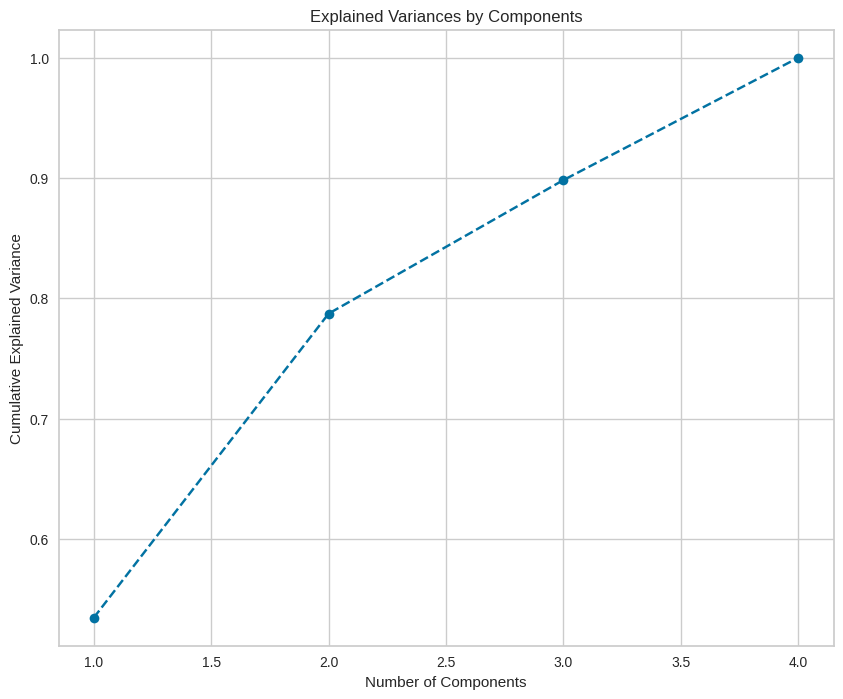

In [187]:
# Visualize the explained variance by individual components
plt.figure(figsize = (10, 8))

plt.plot(range(1, 5), pca1.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

In [188]:
data_scaled_copy_pca

,0,1,2,3
0,-3.025993,0.694030,0.642820,-0.554518
1,-0.584041,-1.419874,-0.108774,-0.215700
2,1.370029,-0.926005,1.090107,0.538655
3,1.389519,-1.163982,0.601813,0.862649
4,0.659902,0.090735,-1.636369,-0.112620
5,-0.105516,-1.681491,-0.280385,0.387278
6,0.319225,-1.509269,-0.632367,0.652137
7,-1.365983,0.797563,-0.451649,0.861352
8,1.224791,0.383906,-0.652329,-0.171935
9,-0.051755,-1.054023,0.563116,-0.279024


In [189]:
#. better representation of the data PCA and variables
cols = ['PCA1', 'PCA2', 'PCA3', 'PCA4']

pc1 = pd.DataFrame(np.round(pca1.components_.T[:, 0:5], 2),index = data_scaled_copy.columns, columns = cols )
pc1

,PCA1,PCA2,PCA3,PCA4
Terme,0.42,0.68,-0.60,-0.08
LUS_6_before_H3,0.54,-0.38,-0.15,0.74
FiO2 max_H3,0.54,0.34,0.77,-0.06
Long_CPAP_invasif_surfactant,0.49,-0.53,-0.17,-0.67


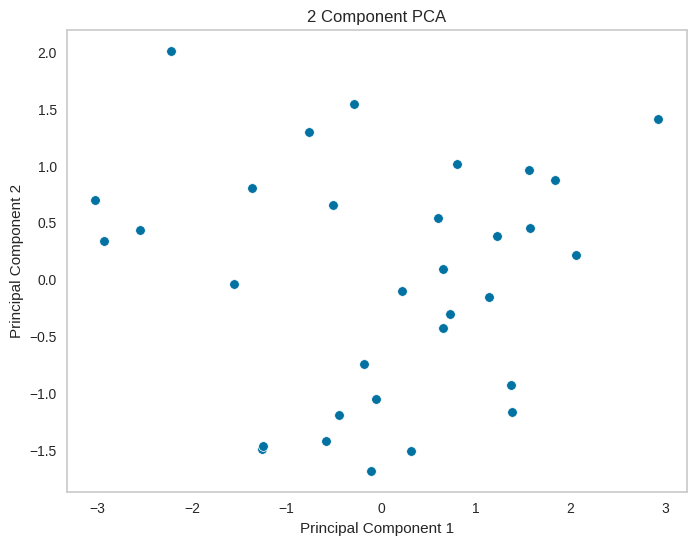

In [190]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_scaled_copy_pca.iloc[:,0], y=data_scaled_copy_pca.iloc[:,1], data=data_scaled_copy_pca)
plt.title('2 Component PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

In [191]:
# adding PCA1 and 2 to the data_scaled data frame. Objective will be to visualize the same scatter plot as above with hue on cylinders
data_scaled_copy['PCA1'] = data_scaled_copy_pca.iloc[:,0]
data_scaled_copy['PCA2'] = data_scaled_copy_pca.iloc[:,1]
data_scaled_copy.head()

,Terme,LUS_6_before_H3,FiO2 max_H3,Long_CPAP_invasif_surfactant,PCA1,PCA2
0,-1.126375,-2.405262,-0.865712,-1.598611,-3.025993,0.694030
1,-1.126375,0.077589,-0.865712,0.625543,-0.584041,-1.419874
2,-0.755170,1.319015,1.229457,0.625543,1.370029,-0.926005
3,-0.643809,1.732823,0.763864,0.625543,1.389519,-1.163982
4,1.323578,0.491398,-0.865712,0.625543,0.659902,0.090735


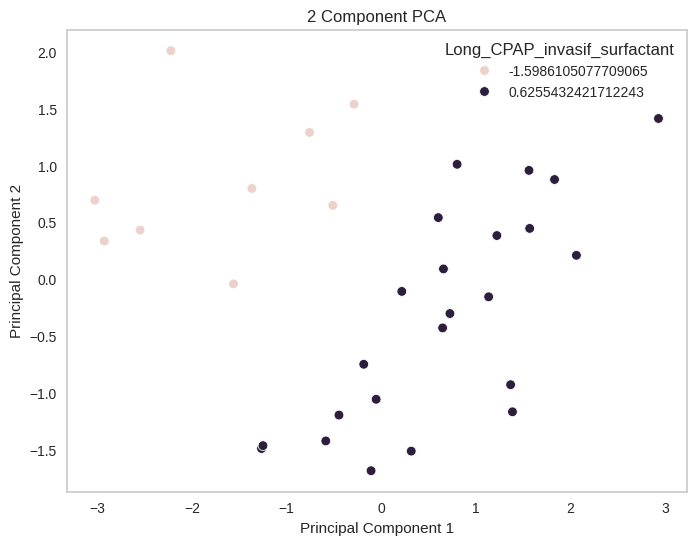

In [192]:
#scatterplot with hue = cylinders
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_scaled_copy_pca.iloc[:,0], y=data_scaled_copy_pca.iloc[:,1], data=data_scaled_copy, hue = 'Long_CPAP_invasif_surfactant')
plt.title('2 Component PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

In [193]:
cluster_profile = df7.groupby("Long_CPAP_invasif_surfactant").mean(numeric_only = True)
cluster_profile

,Terme,LUS_6_before_H3,FiO2 max_H3
Long_CPAP_invasif_surfactant,,,
0,37.222222,3.555556,22.333333
1,38.073913,6.695652,25.652174


In [194]:
cluster_profile["count_in_each_segment"] = df7.groupby("Long_CPAP_invasif_surfactant")['Terme'].count().values
cluster_profile

cluster_profile.style.highlight_max(color = "lightgreen", axis = 0)

,Terme,LUS_6_before_H3,FiO2 max_H3,count_in_each_segment
Long_CPAP_invasif_surfactant,,,,
0,37.222222,3.555556,22.333333,9
1,38.073913,6.695652,25.652174,23


In [228]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix

# Assuming your DataFrame is named 'df3' or 'df4'
# Choose the DataFrame containing your desired features and target

# 1. Prepare the data
features = ['LUS_6_before_H3', 'FiO2 max_H3']
target = 'Long_CPAP_invasif_surfactant'
cut_off = 7

# Check if the columns exist in df4, if not, try df3
'''if all(col in df4.columns for col in features + [target]):
    df = df4
elif all(col in df3.columns for col in features + [target]):
    print("Using df3 as df4 does not contain all necessary columns.")
    df = df3
else:
    raise KeyError(f"Columns {features + [target]} not found in either df3 or df4.")'''

X = df6[features]
y = df6[target]

# 2. Handle missing values (if any)
imputer = SimpleImputer(strategy='mean')  # Or other strategy like 'median'
X = imputer.fit_transform(X)

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# 5. Make predictions on the test set using the cut-off score for LUS_6_before_H3
# We'll use the model's predicted probabilities and the cut-off
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Combine model predictions with cut-off rule for LUS_6_before_H3
lus_predictions = (X_test[:, 0] >= cut_off).astype(int)  # Predictions based on LUS_6_before_H3
combined_predictions = np.where(lus_predictions == 1, 1, (y_probs >= 0.5).astype(int))

# 6. Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, combined_predictions)

# 7. Extract values from confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# 8. Calculate sensitivity and specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# 9. Print the results
print(f"Sensitivity (LUS_6_before_H3 cut-off = {cut_off}): {sensitivity:.2f}")
print(f"Specificity (LUS_6_before_H3 cut-off = {cut_off}): {specificity:.2f}")

# 5. Get coefficients and intercept
coefficients = model.coef_[0]
intercept = model.intercept_[0]

# 6. Print the results
print("Coefficients:")
for feature, coefficient in zip(features, coefficients):
    print(f"{feature}: {coefficient:.2f}")
print(f"Intercept: {intercept:.2f}")

Sensitivity (LUS_6_before_H3 cut-off = 7): 0.83
Specificity (LUS_6_before_H3 cut-off = 7): 1.00
Coefficients:
LUS_6_before_H3: 0.54
FiO2 max_H3: 0.13
Intercept: -5.38


In [230]:
import gradio as gr
import pandas as pd

# Define the prediction function
def predict_probability( FiO2_max_H3, LUS_6_before_H3):
    input_data = pd.DataFrame([ [LUS_6_before_H3, FiO2_max_H3]], columns=['LUS_6_before_H3','FiO2 max_H3' ])
    probability = model.predict_proba(input_data)[0][1]  # Probability of class 1
    print(input_data)
    return probability

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_probability,
    inputs=[
        gr.components.Number(label="FiO2 max_H3"),  # Use gr.components.Number
        gr.components.Number(label="LUS_6_before_H3"), # Use gr.components.Number
    ],
    outputs="number",
    title="Risk Prediction Model",
    description="Enter the values of FiO2 max_H3 and LUS_6_before_H3 to predict the probability of the outcome.",
)

# Launch the interface
iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3683cffb2b186818f2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [235]:
import gradio as gr
import pandas as pd

# Define the prediction function
def predict_probability(FiO2_max_H3, LUS_6_before_H3):
    input_data = pd.DataFrame([[LUS_6_before_H3, FiO2_max_H3]], columns=['LUS_6_before_H3', 'FiO2 max_H3'])
    probability = best_model.predict_proba(input_data)[0][1]  # Probability of class 1
    print(input_data)

    # Add conditional messages
    if probability > 0.48:
        message = "The patient will need CPAP for more than 12h or intubation or surfactant"
    else:
        message = "The patient will need CPAP for less than 12h"

    return probability, message  # Return probability and message

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_probability,  # Use the CORRECT function name: predict_probability
    inputs=[
        gr.components.Number(label="FiO2 max_H3"),
        gr.components.Number(label="LUS_6_before_H3"),
    ],
    outputs=[
        gr.components.Number(label="Probability"),  # Output for probability
        gr.components.Textbox(label="Message")  # Output for the message
    ],
    title="Risk Prediction Model",
    description="Enter the values of FiO2_max_H3 and LUS_6_before_H3 to predict the outcome.",
)

# Launch the interface
iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e4297e85ece70b097a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [236]:
gradio deploy

SyntaxError: invalid syntax (<ipython-input-236-1ccd82e57bfd>, line 1)

In [209]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming your DataFrame is named 'df3' or 'df4'
# Choose the DataFrame containing your desired features and target

# 1. Prepare the data
features = ['LUS_6_before_H3', 'FiO2 max_H3']
target = 'Long_CPAP_invasif_surfactant'
cut_off = 7

# Check if the columns exist in df4, if not, try df3
'''if all(col in df4.columns for col in features + [target]):
    df = df4
elif all(col in df3.columns for col in features + [target]):
    print("Using df3 as df4 does not contain all necessary columns.")
    df = df3
else:
    raise KeyError(f"Columns {features + [target]} not found in either df3 or df4.")'''

X = df6[features]
y = df6[target]

# 2. Handle missing values (if any)
imputer = SimpleImputer(strategy='mean')  # Or other strategy like 'median'
X = imputer.fit_transform(X)

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 3. Define the model and hyperparameter grid
model = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}  # Example hyperparameter grid for 'C'

# 4. Perform GridSearchCV for hyperparameter tuning and cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 5. Evaluate the model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# 5. Make predictions on the test set using the cut-off score for LUS_6_before_H3
# We'll use the model's predicted probabilities and the cut-off
y_probs = best_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Combine model predictions with cut-off rule for LUS_6_before_H3
lus_predictions = (X_test[:, 0] >= cut_off).astype(int)  # Predictions based on LUS_6_before_H3
combined_predictions = np.where(lus_predictions == 1, 1, (y_probs >= 0.5).astype(int))

# 6. Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, combined_predictions)

# 7. Extract values from confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# 8. Calculate sensitivity and specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# 9. Print the results
print(f"Sensitivity (LUS_6_before_H3 cut-off = {cut_off}): {sensitivity:.2f}")
print(f"Specificity (LUS_6_before_H3 cut-off = {cut_off}): {specificity:.2f}")

# 5. Get coefficients and intercept
coefficients = best_model.coef_[0]
intercept = best_model.intercept_[0]

# 6. Print the results
print("Coefficients:")
for feature, coefficient in zip(features, coefficients):
    print(f"{feature}: {coefficient:.2f}")
print(f"Intercept: {intercept:.2f}")

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy}")
print(best_model)

Sensitivity (LUS_6_before_H3 cut-off = 7): 0.83
Specificity (LUS_6_before_H3 cut-off = 7): 1.00
Coefficients:
LUS_6_before_H3: 0.35
FiO2 max_H3: 0.13
Intercept: -4.20
Best Hyperparameters: {'C': 0.1}
Accuracy: 0.8571428571428571
LogisticRegression(C=0.1)


Youden Threshold: 7.00
Youden Index: 0.45


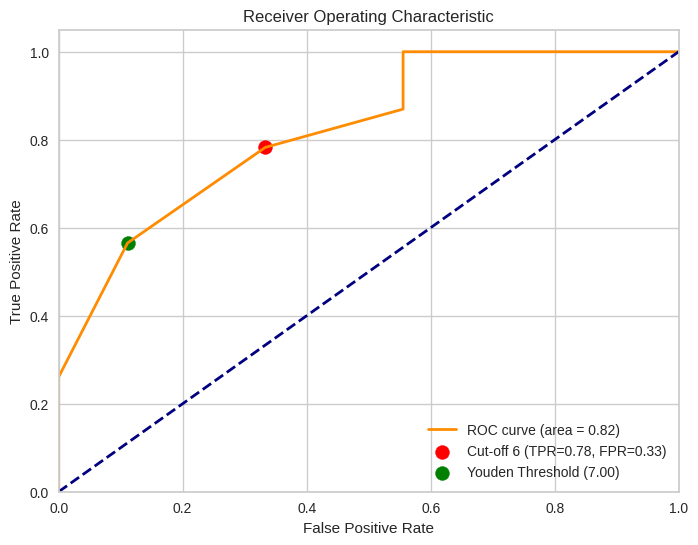

In [ ]:
# ROC curve for LUS_6_before_H3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# ... (previous code for creating binary target and predictions) ...

# Calculate ROC curve
df6 = df3.dropna(subset=['Long_CPAP_invasif_surfactant', 'LUS_6_before_H3'])
fpr, tpr, thresholds = roc_curve(df6['Long_CPAP_invasif_surfactant'], df6['LUS_6_before_H3'])
roc_auc = auc(fpr, tpr)

# Find the index of the threshold closest to 6
threshold_idx = np.argmin(np.abs(thresholds - 6))

# Calculate Youden Index for each threshold
youden_indices = tpr - fpr

# Find the index of the maximum Youden Index
optimal_threshold_index = np.argmax(youden_indices)

# Get the Youden threshold and index
youden_threshold = thresholds[optimal_threshold_index]
youden_index = youden_indices[optimal_threshold_index]

print(f"Youden Threshold: {youden_threshold:.2f}")
print(f"Youden Index: {youden_index:.2f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.scatter(fpr[threshold_idx], tpr[threshold_idx], marker='o', color='red', s=100,
            label=f'Cut-off 6 (TPR={tpr[threshold_idx]:.2f}, FPR={fpr[threshold_idx]:.2f})')
plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], marker='o', color='green', s=100,
            label=f'Youden Threshold ({youden_threshold:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# create a model that uses LUS_6_before_H3, FiO2_max_H3 and kinetics to predict Long_CPAP_invasif_surfactant
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report

# Assuming your DataFrame is named 'df3'

# 1. Prepare the data
features = ['LUS_6_before_H3']
target = 'Long_CPAP_invasif_surfactant'
X = df4[features]
y = df4[target]

# 2. Handle missing values (if any)
imputer = SimpleImputer(strategy='mean')  # Or other strategy like 'median'
X = imputer.fit_transform(X)

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# 4. Create and train the model
model = LogisticRegression()  # Choose a suitable model (e.g., Logistic Regression, Random Forest, etc.)
model.fit(X_train, y_train)

# 5. Make predictions on the test set
y_pred = model.predict(X_test)

# 6. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Display the model coefficients and intercept
print("\nModel Coefficients:")
for feature, coefficient in zip(features, model.coef_[0]):
    print(f"{feature}: {coefficient}")
print(f"Intercept: {model.intercept_[0]}")

Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.75      1.00      0.86         6

    accuracy                           0.75         8
   macro avg       0.38      0.50      0.43         8
weighted avg       0.56      0.75      0.64         8


Model Coefficients:
LUS_6_before_H3: 0.6930914721208219
Intercept: -2.770259334285718


In [ ]:
# create an interface where you ask LUS_6_before_H3,
FiO2 max_H3: 0.15898917552344222
kinetics: -0.31391669252716975
Intercept: -5.782920499141088
Then you calculate linear combination and probablility


NameError: name 'intercept' is not defined

In [ ]:
pr

In [ ]:
df4

,OSI_H1,LUS_6_before_H3,LUS_6_H6,LUS_6_H12,Surfactant,FiO2 max_H3,FiO2 max_H6,Long_CPAP_invasif_surfactant
0,1.3,0.0,NaN,NaN,0,21.0,21.0,0
1,1.9,6.0,NaN,NaN,0,21.0,21.0,1
9,1.8,9.0,10.0,4.0,1,30.0,35.0,1
10,1.6,10.0,NaN,NaN,1,28.0,28.0,1
11,1.9,7.0,NaN,NaN,0,21.0,21.0,1
12,1.9,8.0,NaN,NaN,0,21.0,21.0,1
13,1.9,9.0,NaN,NaN,0,21.0,21.0,1
14,1.5,5.0,NaN,NaN,0,21.0,21.0,0
15,1.9,7.0,NaN,NaN,0,26.0,23.0,1
16,1.9,NaN,1.0,NaN,0,21.0,21.0,0


In [ ]:
# create a graph showing on x_axis LUS_6_before_H3, LUS_6_H6 and on y_axis the values for each row
# Create a single figure and axes

# Use .loc to select rows based on multiple column conditions
df6 = df3[['LUS_6_before_H3','LUS_6_H6','LUS_6_H12']]

df6

,LUS_6_before_H3,LUS_6_H6,LUS_6_H12
0,0.0,NaN,NaN
1,6.0,NaN,NaN
9,9.0,10.0,4.0
10,10.0,NaN,NaN
11,7.0,NaN,NaN
12,8.0,NaN,NaN
13,9.0,NaN,NaN
14,5.0,NaN,NaN
15,7.0,NaN,NaN
16,NaN,1.0,NaN


In [ ]:
df6.shape[0]

39

In [ ]:
df2

,Numéro patient,Lieu naissance,Terme,Sexe,PN,CTC < 15j,Voie accouchement,FiO2 max_H1,PEEP_H1,OSI_H1,...,LUS_6_H48,Outcome,Surfactant,Diagnosis,Heure arrêt CPAP,Unnamed: 46,Unnamed: 47,LUS_6_before_H3,Invasive,CPAP_12_plus
20,22,HFB,35.0,M,2120.0,no,voie basse,>=30%,6.0,1.9,...,NaN,Non transféré,non,DRT,9,NaN,NaN,NaN,0,0
22,24,HFB,33.3,F,2420.0,yes,voie basse,<30%,5.0,1.1,...,NaN,Transféré,non,DRT,32,NaN,NaN,4.0,0,1
24,26,HFB,40.7,M,4130.0,no,voie basse,>=30%,5.0,2.1,...,NaN,Transféré,non,DRT,24,NaN,NaN,7.0,0,1
28,30,HFB,35.6,M,2200.0,no,voie basse,<30%,6.0,1.3,...,NaN,Non transféré,non,DRT,8,NaN,NaN,6.0,0,0
37,39,HFB,35.0,F,2690.0,no,césarienne avant travail,<30%,7.0,1.8,...,NaN,Transféré,non,DRT,48,NaN,NaN,NaN,0,1
50,57,HFB,35.0,M,2250.0,yes,voie basse,<30%,6.0,1.3,...,NaN,Non transféré,non,DRT,6,NaN,NaN,2.0,0,0
62,71,Versailles,40.0,NaN,3920.0,no,voie basse,<30%,5.0,1.1,...,NaN,Non transféré,non,DRT,16,NaN,>12,6.0,0,1
63,72,Versailles,39.8,NaN,3135.0,no,voie basse,>=30%,6.0,1.9,...,NaN,Non transféré,non,DRT,20,NaN,>18,8.0,0,1


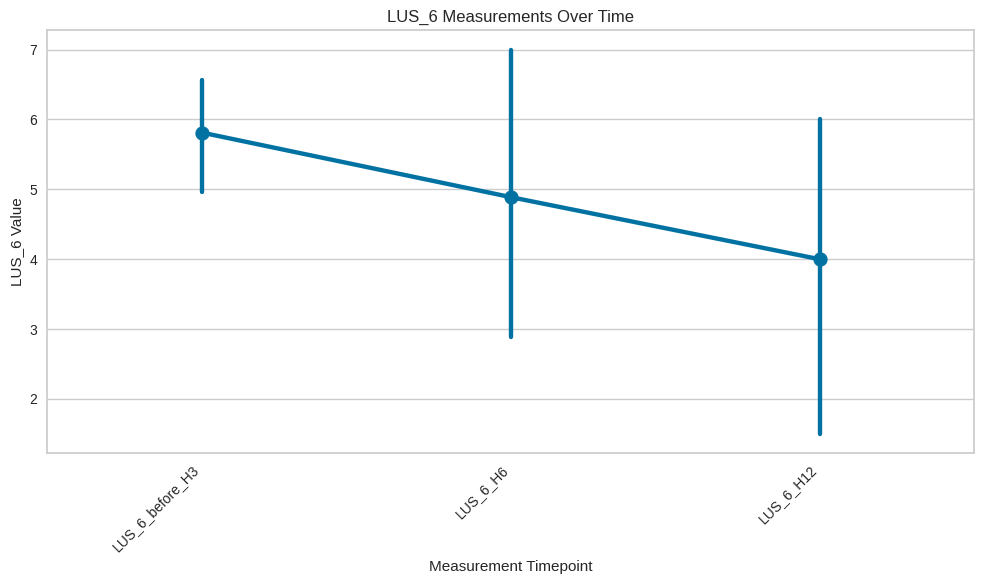

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df6'

# Melt the DataFrame to a long format suitable for seaborn
df6_melted = df6.melt(var_name='Measurement', value_name='Value')

# Create the pointplot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.pointplot(x='Measurement', y='Value', data=df6_melted)
plt.title('LUS_6 Measurements Over Time')  # Set a descriptive title
plt.xlabel('Measurement Timepoint')  # Label the x-axis
plt.ylabel('LUS_6 Value')  # Label the y-axis
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            39 non-null     int64  
 1   LUS_6_before_H3  32 non-null     float64
 2   LUS_6_H6         9 non-null      float64
 3   LUS_6_H12        4 non-null      float64
dtypes: float64(3), int64(1)
memory usage: 1.3 KB


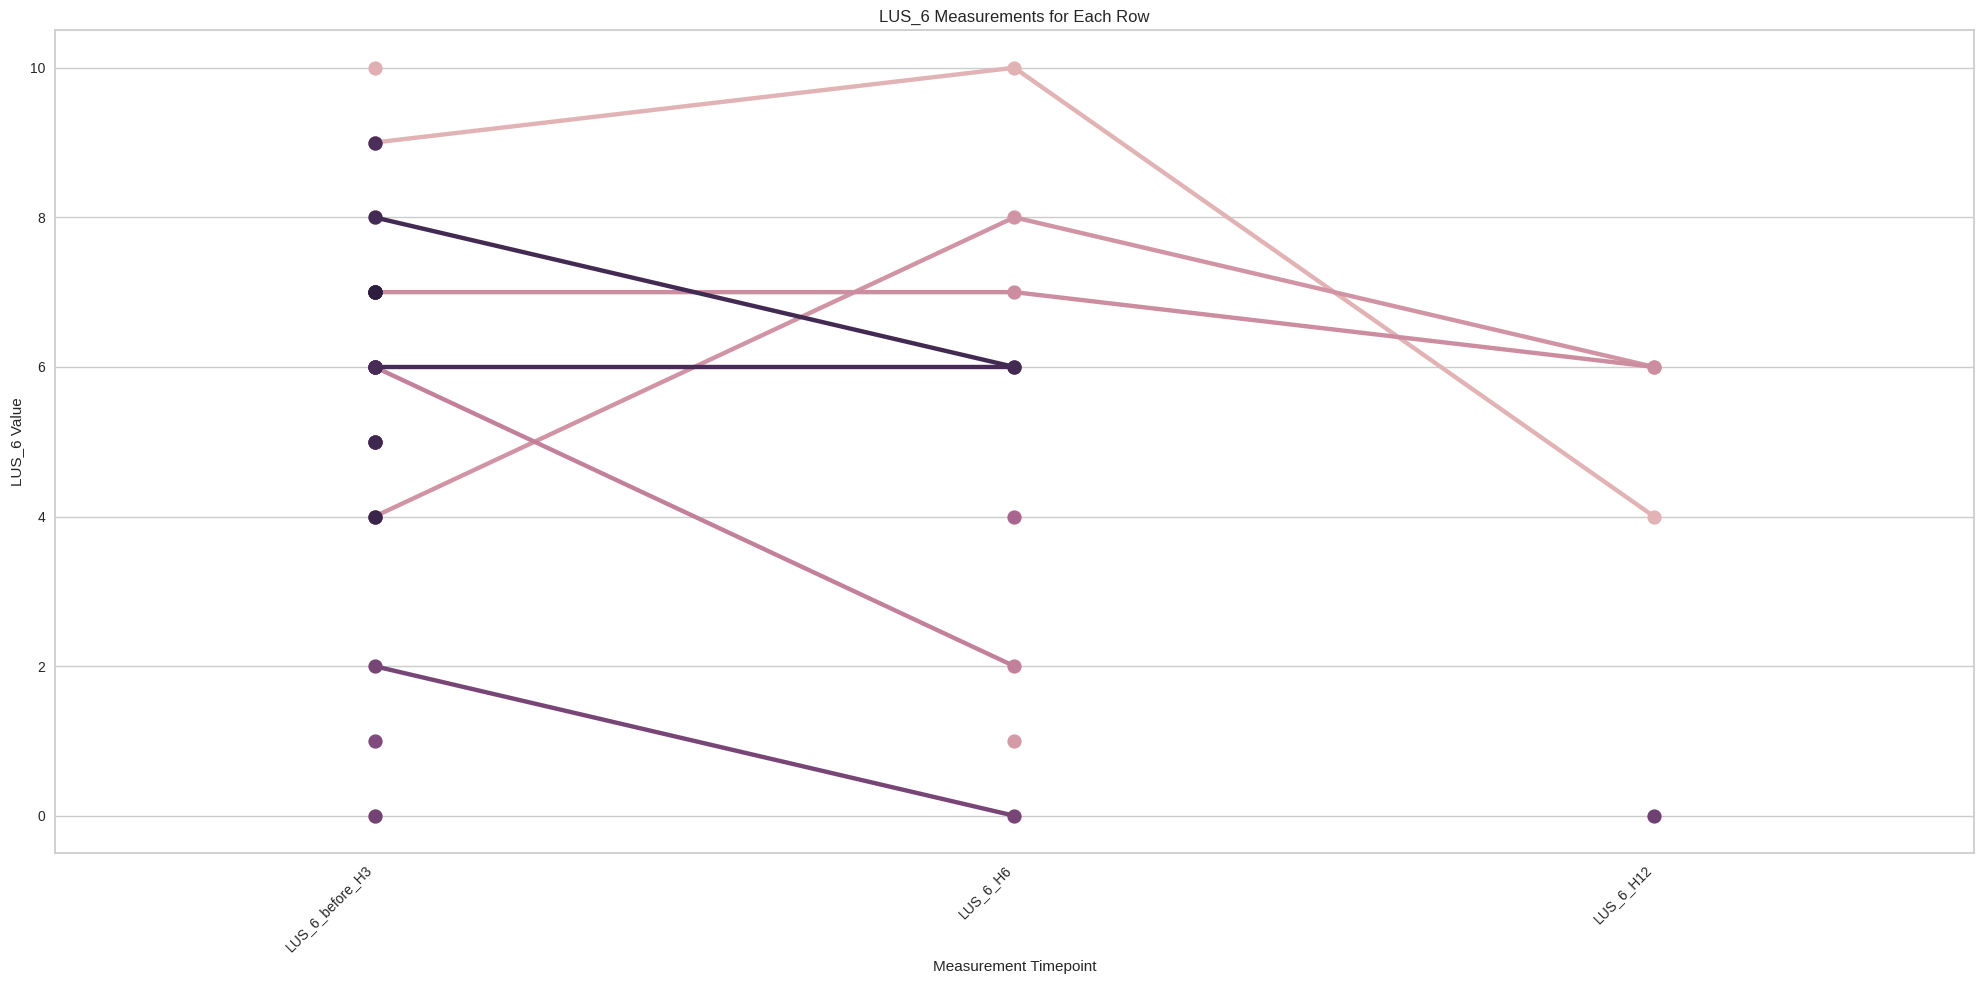

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named 'df6'

# Reset index to use as identifier for each row
df6 = df6.reset_index()

# Melt the DataFrame, keeping the 'index' as an identifier for each row
df6_melted = pd.melt(df6, id_vars=['index'], value_vars=df6.columns[1:],
                     var_name='Measurement', value_name='Value')

# Create the pointplot, using 'hue' to distinguish rows
plt.figure(figsize=(20, 10))
sns.pointplot(x='Measurement', y='Value', hue='index', data=df6_melted,
              legend=False)  # Remove legend for clarity

plt.title('LUS_6 Measurements for Each Row')
plt.xlabel('Measurement Timepoint')
plt.ylabel('LUS_6 Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df4.head()

,OSI_H1,LUS_6_before_H3,LUS_6_H6,LUS_6_H12,Surfactant,FiO2 max_H3,FiO2 max_H6,Long_CPAP_invasif_surfactant
0,1.3,0.0,NaN,NaN,0,21.0,21.0,0
1,1.9,6.0,NaN,NaN,0,21.0,21.0,1
9,1.8,9.0,10.0,4.0,1,30.0,35.0,1
10,1.6,10.0,NaN,NaN,1,28.0,28.0,1
11,1.9,7.0,NaN,NaN,0,21.0,21.0,1


In [ ]:
df7 = df4[df4['Long_CPAP_invasif_surfactant']==1]
df8 = df7[['LUS_6_before_H3','LUS_6_H6','LUS_6_H12']]
df8.head()


,LUS_6_before_H3,LUS_6_H6,LUS_6_H12
1,6.0,NaN,NaN
9,9.0,10.0,4.0
10,10.0,NaN,NaN
11,7.0,NaN,NaN
12,8.0,NaN,NaN


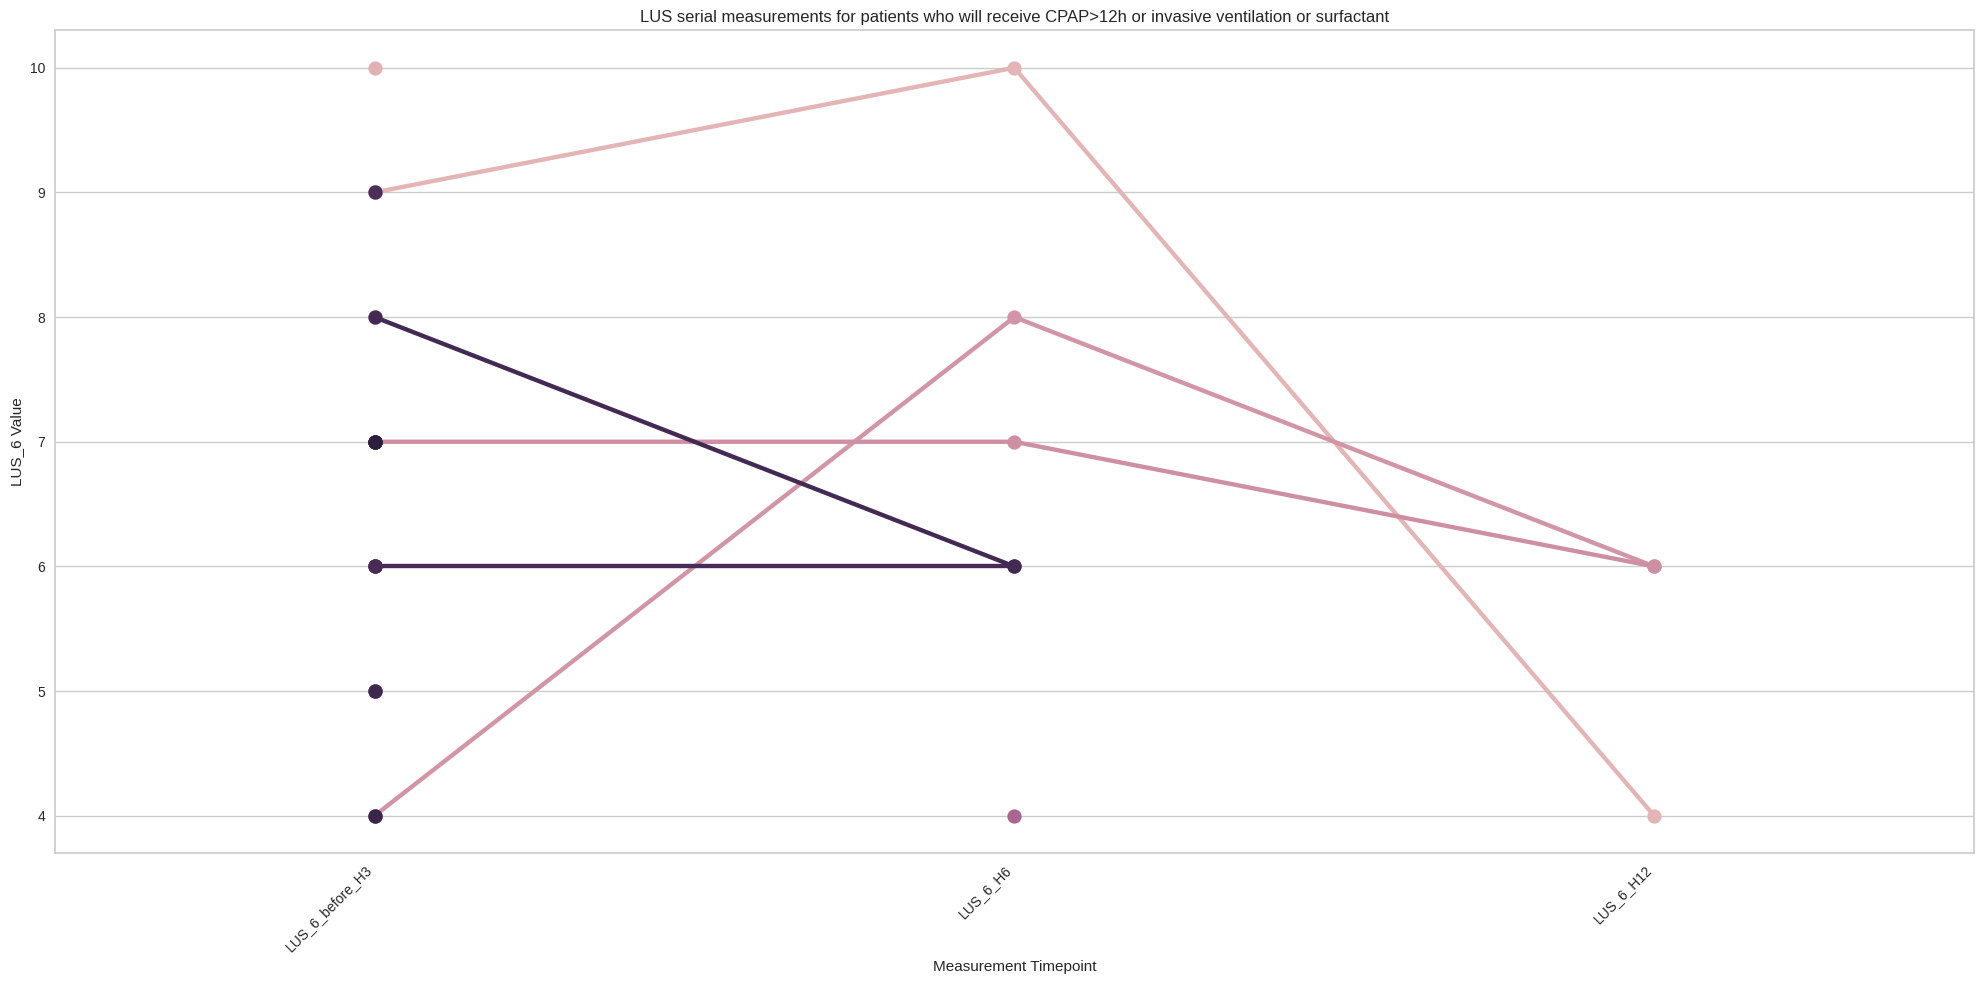

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named 'df6'

# Reset index to use as identifier for each row
df8 = df8.reset_index()

# Melt the DataFrame, keeping the 'index' as an identifier for each row
df8_melted = pd.melt(df8, id_vars=['index'], value_vars=df8.columns[1:],
                     var_name='Measurement', value_name='Value')

# Create the pointplot, using 'hue' to distinguish rows
plt.figure(figsize=(20, 10))
sns.pointplot(x='Measurement', y='Value', hue='index', data=df8_melted,
              legend=False)  # Remove legend for clarity

plt.title('LUS_6 Measurements for Each Row')
plt.xlabel('Measurement Timepoint')
plt.ylabel('LUS_6 Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.title('LUS serial measurements for patients who will receive CPAP>12h or invasive ventilation or surfactant')
plt.show()

In [ ]:
df9 = df4[df4['Long_CPAP_invasif_surfactant']==0]
df10 = df9[['LUS_6_before_H3','LUS_6_H6','LUS_6_H12']]
df10.head()


,LUS_6_before_H3,LUS_6_H6,LUS_6_H12
0,0.0,NaN,NaN
14,5.0,NaN,NaN
16,NaN,1.0,NaN
24,6.0,2.0,NaN
35,5.0,NaN,NaN


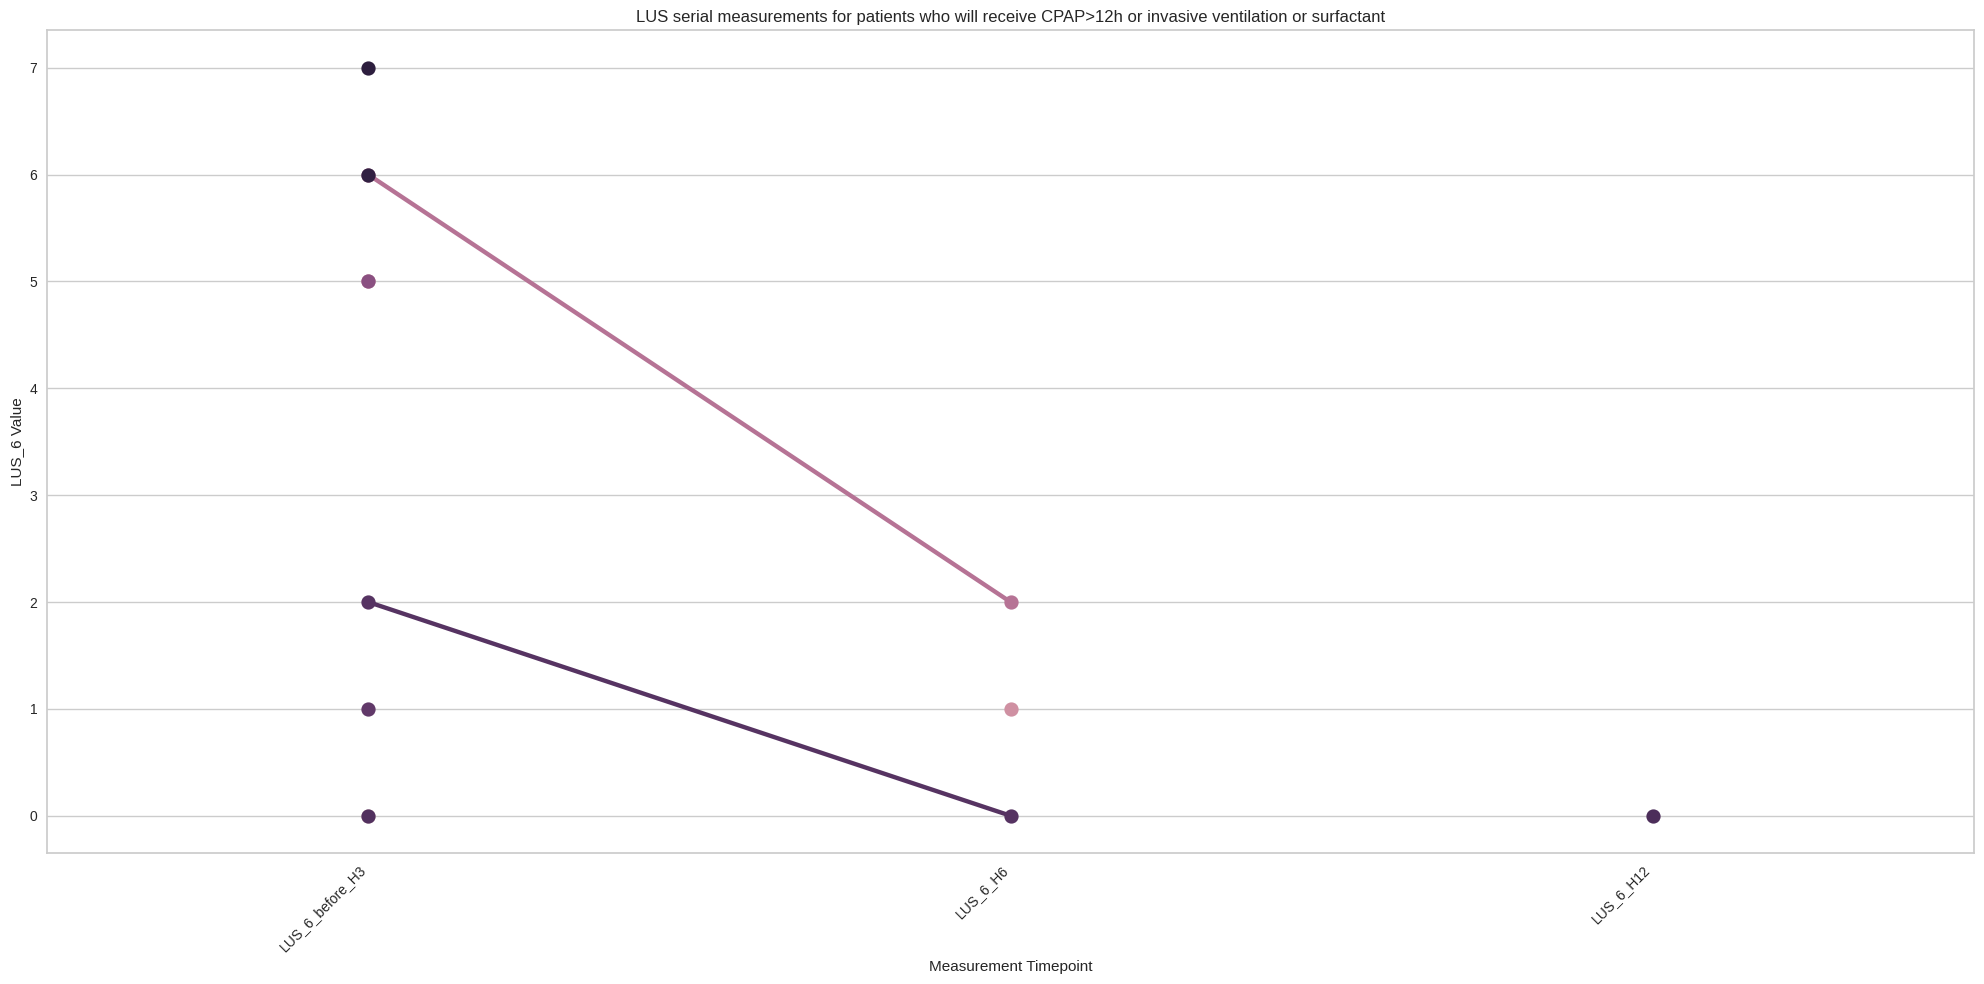

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named 'df6'

# Reset index to use as identifier for each row
df10 = df10.reset_index()

# Melt the DataFrame, keeping the 'index' as an identifier for each row
df10_melted = pd.melt(df10, id_vars=['index'], value_vars=df10.columns[1:],
                     var_name='Measurement', value_name='Value')

# Create the pointplot, using 'hue' to distinguish rows
plt.figure(figsize=(20, 10))
sns.pointplot(x='Measurement', y='Value', hue='index', data=df10_melted,
              legend=False)  # Remove legend for clarity

plt.title('LUS_6 Measurements for Each Row')
plt.xlabel('Measurement Timepoint')
plt.ylabel('LUS_6 Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.title('LUS serial measurements for patients who will receive CPAP>12h or invasive ventilation or surfactant')
plt.show()

KeyError: 16

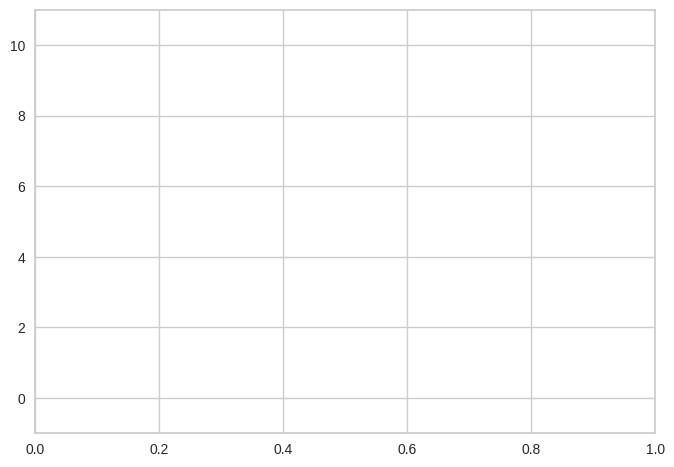

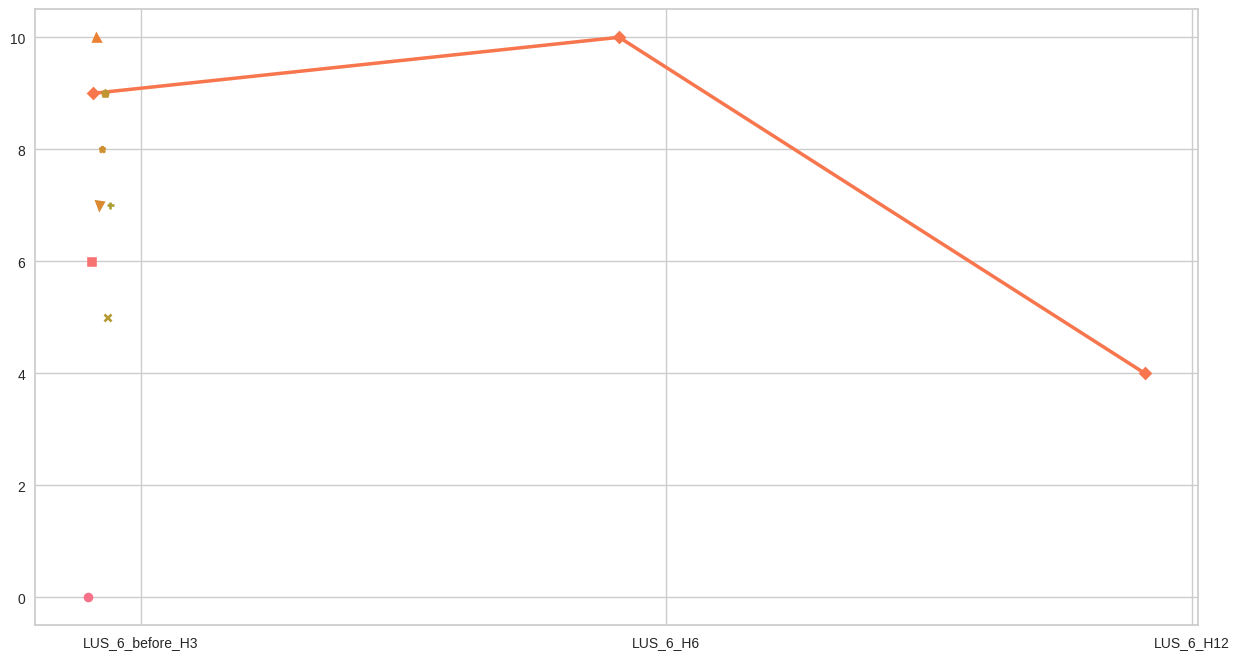

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ... (Your previous code) ...

# Generate a custom color palette with enough colors
num_rows = df6_melted['index'].nunique()
colors = sns.color_palette("husl", num_rows)  # Use "husl" or another palette

# Calculate y-axis limits to ensure all data is visible
y_min = df6_melted['Value'].min()
y_max = df6_melted['Value'].max()
y_range = y_max - y_min
plt.ylim(y_min - 0.1 * y_range, y_max + 0.1 * y_range)  # Add padding

plt.figure(figsize=(15, 8))  # Increase figure size
sns.pointplot(x='Measurement', y='Value', hue='index', data=df6_melted,
              legend=False, markers=['o', 's', 'D', '^', 'v', '*', 'p', 'x', '+'],
              scale=0.8, dodge=0.2, palette=colors)  # Add custom palette


# ... (Rest of your plotting code) ...

Optimal Threshold: 0.89
Youden Index: 0.50

Confusion Matrix (using optimal threshold):
[[2 0]
 [3 3]]


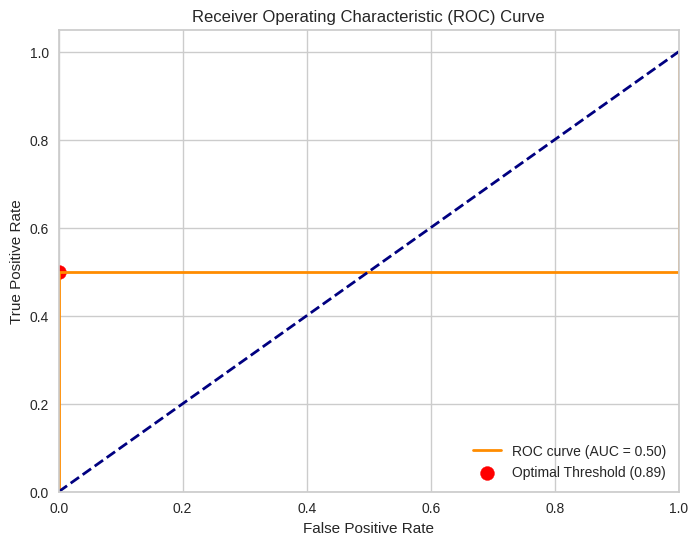

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, confusion_matrix

# Assuming you have trained your model as 'model' and have your test data as 'X_test' and 'y_test'

# Get predicted probabilities for the positive class (y = 1)
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate Youden Index for each threshold
youden_indices = tpr - fpr

# Find the optimal threshold
optimal_threshold_index = np.argmax(youden_indices)
optimal_threshold = thresholds[optimal_threshold_index]

# Print the optimal threshold and corresponding Youden Index
print(f"Optimal Threshold: {optimal_threshold:.2f}")
print(f"Youden Index: {youden_indices[optimal_threshold_index]:.2f}")

# You can now use this optimal threshold to make predictions:
y_pred = (y_probs >= optimal_threshold).astype(int)

# Evaluate the model using the optimal threshold
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix (using optimal threshold):")
print(conf_matrix)

# Plot ROC curve with optimal threshold
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_score(y_test, y_probs):.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], marker='o', color='red', s=100,
            label=f'Optimal Threshold ({optimal_threshold:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [210]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.5 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.24.7
    Uninstalling huggingface-hub-0.24.7:
      Successfully uninstalled huggingface-hub-0.24.7


In [215]:
df6.head()

,Terme,PN,OSI_H1,LUS_6_before_H3,LUS_6_H6,LUS_6_H12,Invasive,FiO2 max_H3,FiO2 max_H6,kinetics,...,Sexe_M,Voie accouchement_césarienne avant travail,Voie accouchement_césarienne en urgence,Voie accouchement_voie basse,Surfactant_non,Surfactant_oui,delai_stop_CPAP_<=12h,delai_stop_CPAP_12-24h,delai_stop_CPAP_>24h,Long_CPAP_invasif_surfactant
0,34.8,1980,1.3,0.0,NaN,NaN,0,21.0,21.0,NaN,...,False,False,False,True,True,False,True,False,False,0
1,34.8,2400,1.9,6.0,NaN,NaN,0,21.0,21.0,NaN,...,True,False,False,True,True,False,False,True,False,1
9,35.8,3100,1.8,9.0,10,4.0,0,30.0,35.0,0.0,...,False,False,True,False,False,True,False,True,False,1
10,36.1,2595,1.6,10.0,NaN,NaN,0,28.0,28.0,NaN,...,True,True,False,False,False,True,False,False,True,1
11,41.4,3490,1.9,7.0,NaN,NaN,0,21.0,21.0,NaN,...,True,False,False,True,True,False,False,True,False,1


In [216]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming your DataFrame is named 'df3' or 'df4'
# Choose the DataFrame containing your desired features and target

# 1. Prepare the data
features = ['LUS_6_before_H3', 'FiO2 max_H3']
target = 'Long_CPAP_invasif_surfactant'
cut_off = 7

# Check if the columns exist in df4, if not, try df3
'''if all(col in df4.columns for col in features + [target]):
    df = df4
elif all(col in df3.columns for col in features + [target]):
    print("Using df3 as df4 does not contain all necessary columns.")
    df = df3
else:
    raise KeyError(f"Columns {features + [target]} not found in either df3 or df4.")'''

X = df6[features]
y = df6[target]

# 2. Handle missing values (if any)
imputer = SimpleImputer(strategy='mean')  # Or other strategy like 'median'
X = imputer.fit_transform(X)

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 3. Define the model and hyperparameter grid
model = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}  # Example hyperparameter grid for 'C'

# 4. Perform GridSearchCV for hyperparameter tuning and cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 5. Evaluate the model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# 5. Make predictions on the test set using the cut-off score for LUS_6_before_H3
# We'll use the model's predicted probabilities and the cut-off
y_probs = best_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Combine model predictions with cut-off rule for LUS_6_before_H3
lus_predictions = (X_test[:, 0] >= cut_off).astype(int)  # Predictions based on LUS_6_before_H3
combined_predictions = np.where(lus_predictions == 1, 1, (y_probs >= 0.5).astype(int))

# 6. Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, combined_predictions)

# 7. Extract values from confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# 8. Calculate sensitivity and specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# 9. Print the results
print(f"Sensitivity (LUS_6_before_H3 cut-off = {cut_off}): {sensitivity:.2f}")
print(f"Specificity (LUS_6_before_H3 cut-off = {cut_off}): {specificity:.2f}")

# 5. Get coefficients and intercept
coefficients = best_model.coef_[0]
intercept = best_model.intercept_[0]

# 6. Print the results
print("Coefficients:")
for feature, coefficient in zip(features, coefficients):
    print(f"{feature}: {coefficient:.2f}")
print(f"Intercept: {intercept:.2f}")

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy}")
print(best_model)

Sensitivity (LUS_6_before_H3 cut-off = 7): 0.83
Specificity (LUS_6_before_H3 cut-off = 7): 1.00
Coefficients:
LUS_6_before_H3: 0.35
FiO2 max_H3: 0.13
Intercept: -4.20
Best Hyperparameters: {'C': 0.1}
Accuracy: 0.8571428571428571
LogisticRegression(C=0.1)


In [233]:
import gradio as gr
import pandas as pd

# Define the prediction function
def predict_probability( FiO2_max_H3, LUS_6_before_H3):
    input_data = pd.DataFrame([ [LUS_6_before_H3, FiO2_max_H3]], columns=['LUS_6_before_H3','FiO2 max_H3' ])
    probability = best_model.predict_proba(input_data)[0][1]  # Probability of class 1
    print(input_data)
    return probability

# Add conditional messages
    if probability > 0.48:
        message = "The patient will need CPAP for more than 12h or intubation or surfactant"
    else:
        message = "The patient will need CPAP for less than 12h"

    return probability, message  # Return probability and message

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_probability,  # Use the CORRECT function name: predict_probability
    inputs=[
        gr.components.Number(label="FiO2 max_H3"),
        gr.components.Number(label="LUS_6_before_H3"),
    ],
    outputs=[
        gr.components.Number(label="Probability"),  # Output for probability
        gr.components.Textbox(label="Message")  # Output for the message
    ],
    title="Risk Prediction Model",
    description="Enter the values of FiO2_max_H3 and LUS_6_before_H3 to predict the outcome.",
)

# Launch the interface
iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://73b3f0d4ae96b60481.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
